# 206051G - Karan S.

In [2]:
!pip install nbconvert
!pip install pyppeteer


     -------------------------------------- 82.9/82.9 kB 232.1 kB/s eta 0:00:00
     ------------------------------------- 101.4/101.4 kB 24.1 kB/s eta 0:00:00
     ------------------------------------- 163.0/163.0 kB 52.3 kB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


Dataset Selection : G : Estimation of Obesity Levels Based On Eating Habits and Physical Condition

# Data Exploring & Preprocessing 

## Data Exploring 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df1 = pd.read_csv(r"C:\Users\User\Desktop\ML Project\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df1.shape

(2111, 17)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df1.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

This project aims to predict obesity levels based on various health and lifestyle-related features using machine learning algorithms. Dataset contains 2111 rows and 17 features notably weight, height, age and dietary habits. The target variable is the obesity category into seven distinct levels. The data includes both numerical and categorical variables.

In [6]:
# Check for missing values
missing_values = df1.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Seems like there are no any missing values. And the data types are properly assigned. 

In [7]:
df1.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

The dataset contains people from age 14 to 61. The height and weights differs across people evenly. The other dietary habit features are probably taken from a survey as frequency and shows the numbers.  

In [8]:
df1.describe(include=['object'])

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

The categorical variable consists of both binary as well as probably ordinary variables as it seems to focus about frequency. The categorical features include various levels, such as Gender with two unique values (Male and Female) and family history with overweight having 'yes' and 'no' as values. The most frequent categories are identified, such as the majority of the dataset being Male, and the most common transportation method being Public Transportation. The target variable, NObeyesdad, has seven unique categories, with Obesity Type I being the most common.

In [9]:
print(df1['CAEC'].value_counts())

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [10]:
print(df1['MTRANS'].value_counts())

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


In [11]:
print(df1['CALC'].value_counts())

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


In [12]:
print(df1['NObeyesdad'].value_counts())

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


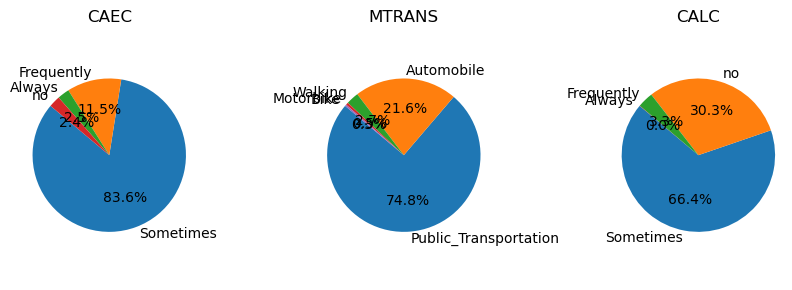

In [13]:

import matplotlib.pyplot as plt



# List of columns to plot
columns_to_plot = ['CAEC', 'MTRANS', 'CALC']

# Create a figure with subplots
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(8, 3))  # Adjust figsize for a row of 4 plots

# Plot pie charts for each column
for ax, column in zip(axs, columns_to_plot):
    counts = df1[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{column}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Tight layout for better spacing
plt.tight_layout()
plt.show()

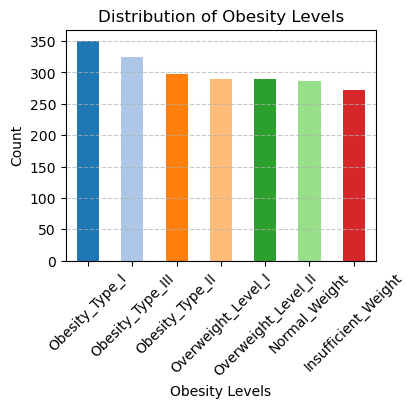

In [14]:

# Count the unique values in the 'NObeyesdad' column
counts = df1['NObeyesdad'].value_counts()

# Define colors for the bars
colors = plt.cm.tab20.colors[:len(counts)]

# Plot the bar chart
plt.figure(figsize=(4, 3))  # Adjust the size as needed
counts.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Obesity Levels')
plt.ylabel('Count')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

The above outputs shows that there is a clear order to indicate among the responses and it must be addressed when encoding. Also, the target variable classes are somewhat balanced but not perfectly. The counts for each class are relatively close to each other, which suggests a moderate imbalance.

In [15]:
# Check for duplicated rows
duplicates = df1.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows, if any
if duplicates.sum() > 0:
    print(df1[duplicates])

Number of duplicate rows: 24
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.

In [16]:
# Drop duplicates, keeping the first occurrence
df1 = df1.drop_duplicates(keep='first')

# Check the number of duplicates after cleaning (should be 0)
duplicates_after = df1.duplicated()
print(f"Number of duplicate rows after dropping: {duplicates_after.sum()}")

Number of duplicate rows after dropping: 0


In [17]:
df1.shape

(2087, 17)

Initially, the dataset contained 24 duplicate rows. These were removed to ensure that the dataset had unique entries, as duplicates can negatively impact the model's performance. The existing dataframe consists 2087 unique entries

# EDA

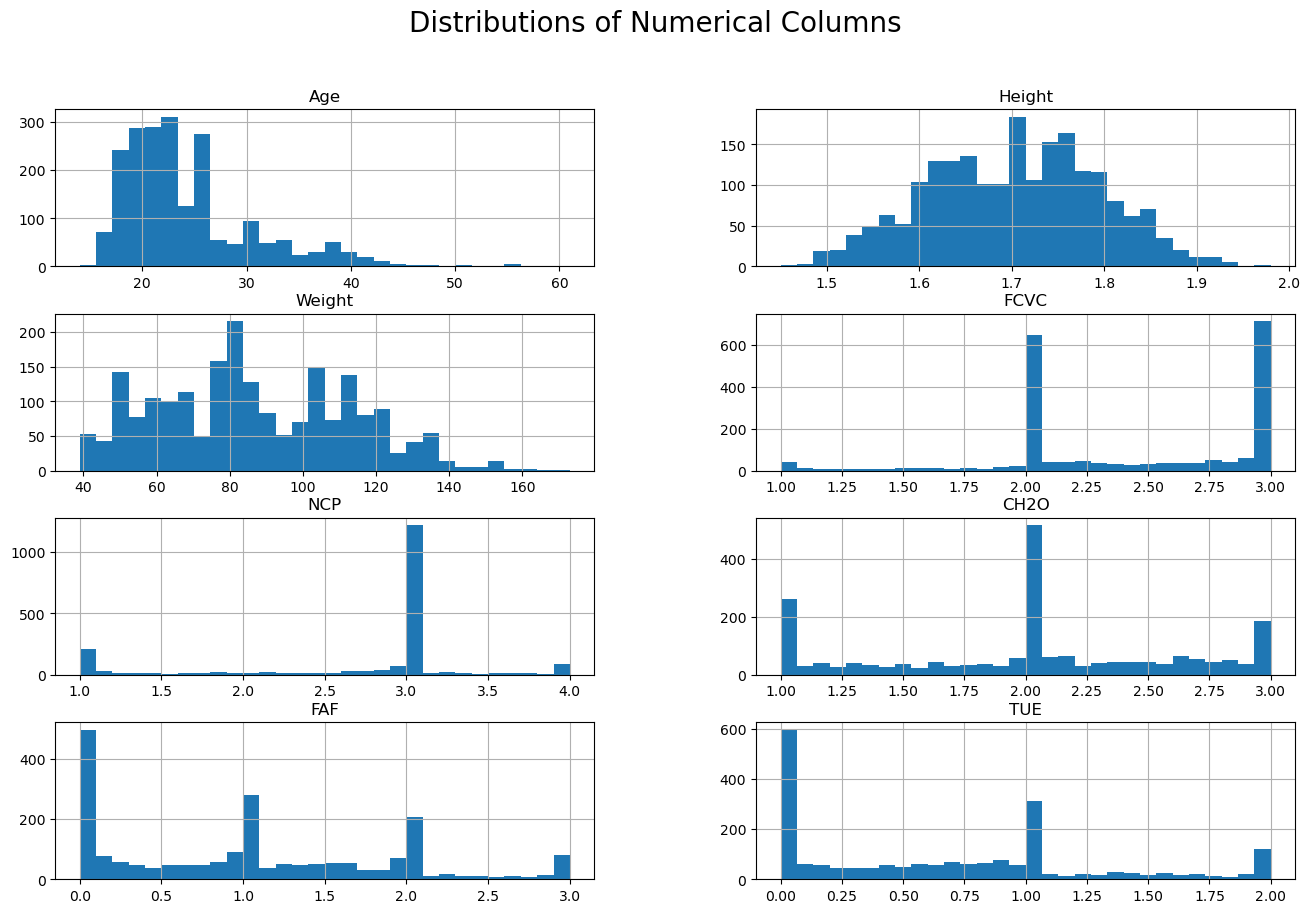

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical columns
df1.hist(bins=30, figsize=(16, 10), layout=(4, 2))
plt.suptitle('Distributions of Numerical Columns', size=20)
plt.show()

* Age: The histogram shows a distribution with a central peak around the early twenties. The ages range from 14 to 61, with most individuals clustered in the 20-30 age range. There are fewer individuals at the extremes of the age range.
* Height: The histogram displays a bell-shaped curve with most heights concentrated around the mean of approximately 1.70 meters. Heights range from 1.45 to 1.98 meters, with the majority of values falling between 1.60 and 1.80 meters.
* Weight: The distribution is slightly right-skewed with a peak around the mean weight of 86.59 kg. Weights range from 39 kg to 173 kg, with more individuals clustered around the lower to mid-range weights.
* FCVC (Frequency of Consumption of High-Calorie Food): The histogram is typically centered around values of 2 and 3, indicating that most individuals consume high-calorie foods a few times a week. The values range from 1 to 3.
* NCP (Number of Main Courses Consumed per Day): This histogram generally shows a concentration around the values of 2 and 3, indicating that most individuals consume 2-3 main courses per day. The range extends from 1 to 4.
* CH2O (Water Consumption in Liters per Day): The histogram often shows a central tendency around 2 liters, with most values clustered between 1 and 3 liters. 
* FAF (Physical Activity Frequency): The histogram typically centers around values of 1 and 2, suggesting that most individuals engage in physical activity a few times a week. The range is from 0 to 3.
* TUE (Time Spent on Exercise per Day): The distribution is usually concentrated around lower values, indicating that most individuals spend a relatively small amount of time on exercise each day. The values range from 0 to 2 hours.


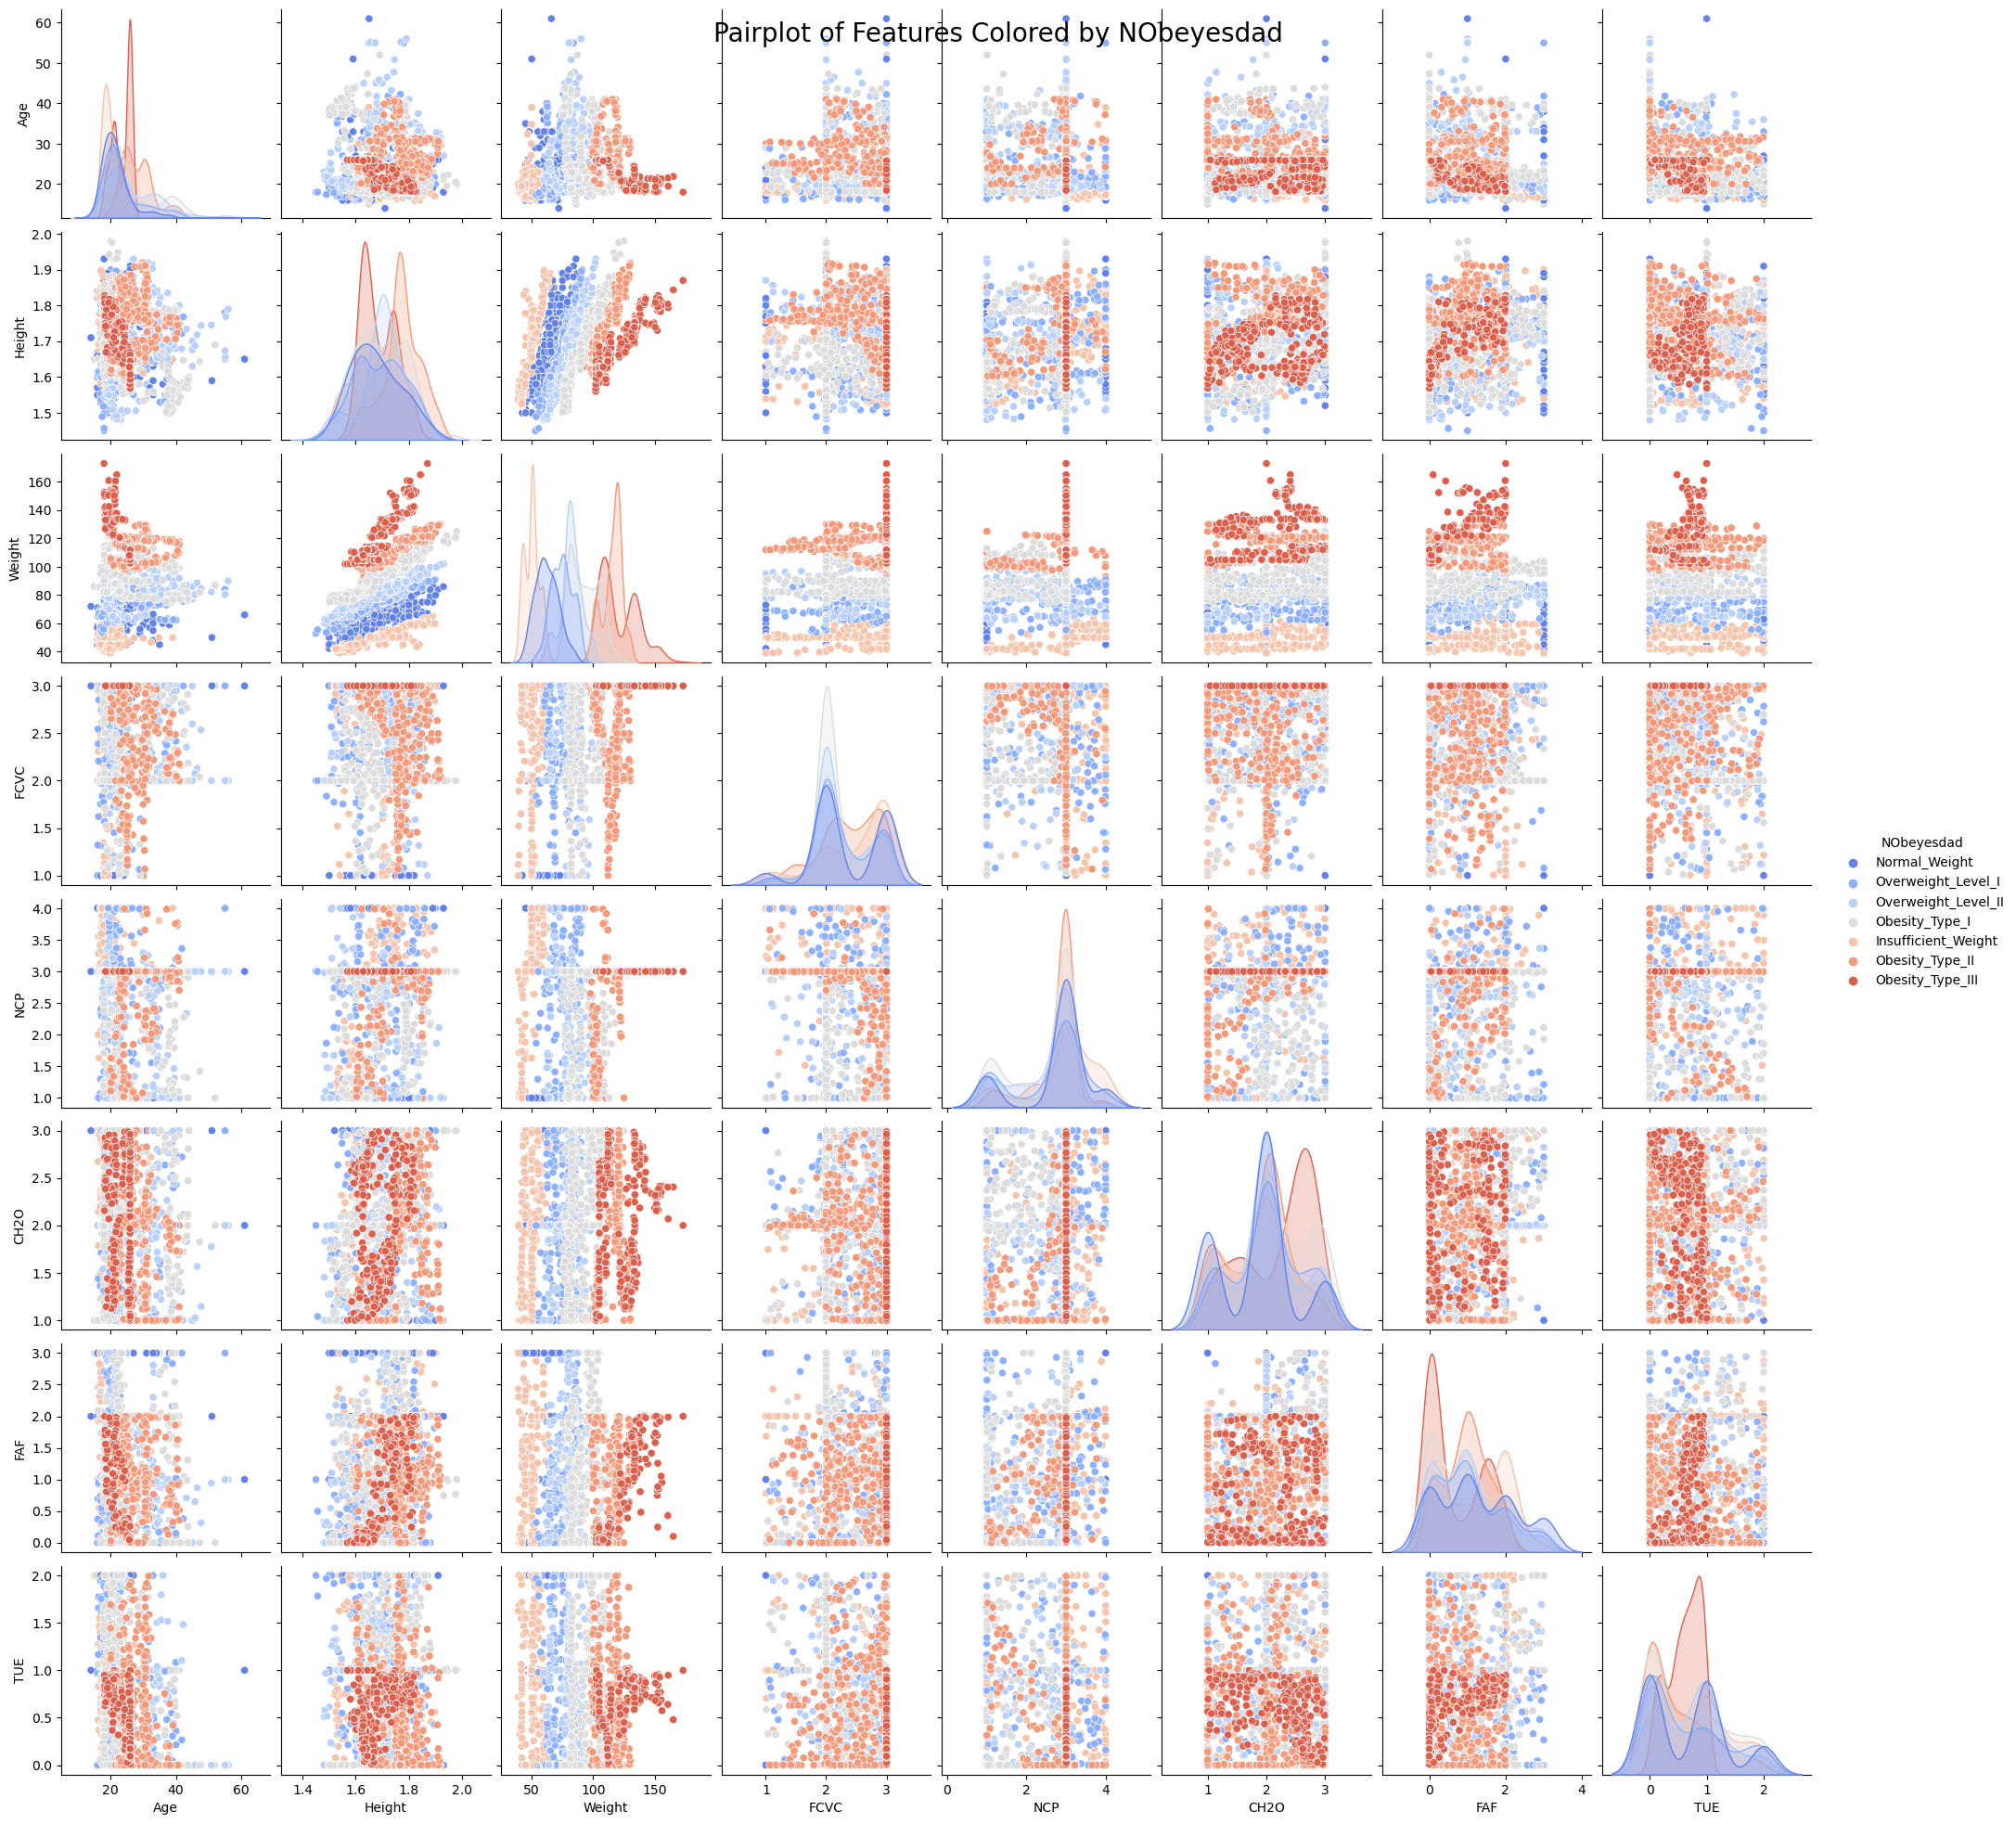

In [19]:
# Plot relationships between features
sns.pairplot(df1, hue="NObeyesdad", palette="coolwarm")
plt.suptitle('Pairplot of Features Colored by NObeyesdad', size=20)
plt.show()

We can see some relationships seems to be positive, negative while others seems to scatter out and have no relationship. For example, the Age feature is distributed with a peak in the 20s, while Weight shows a more spread-out distribution. It is notable that features such as height have less influence towards the dietary habit features such as FCVC, NCP, CH2O and FAF.

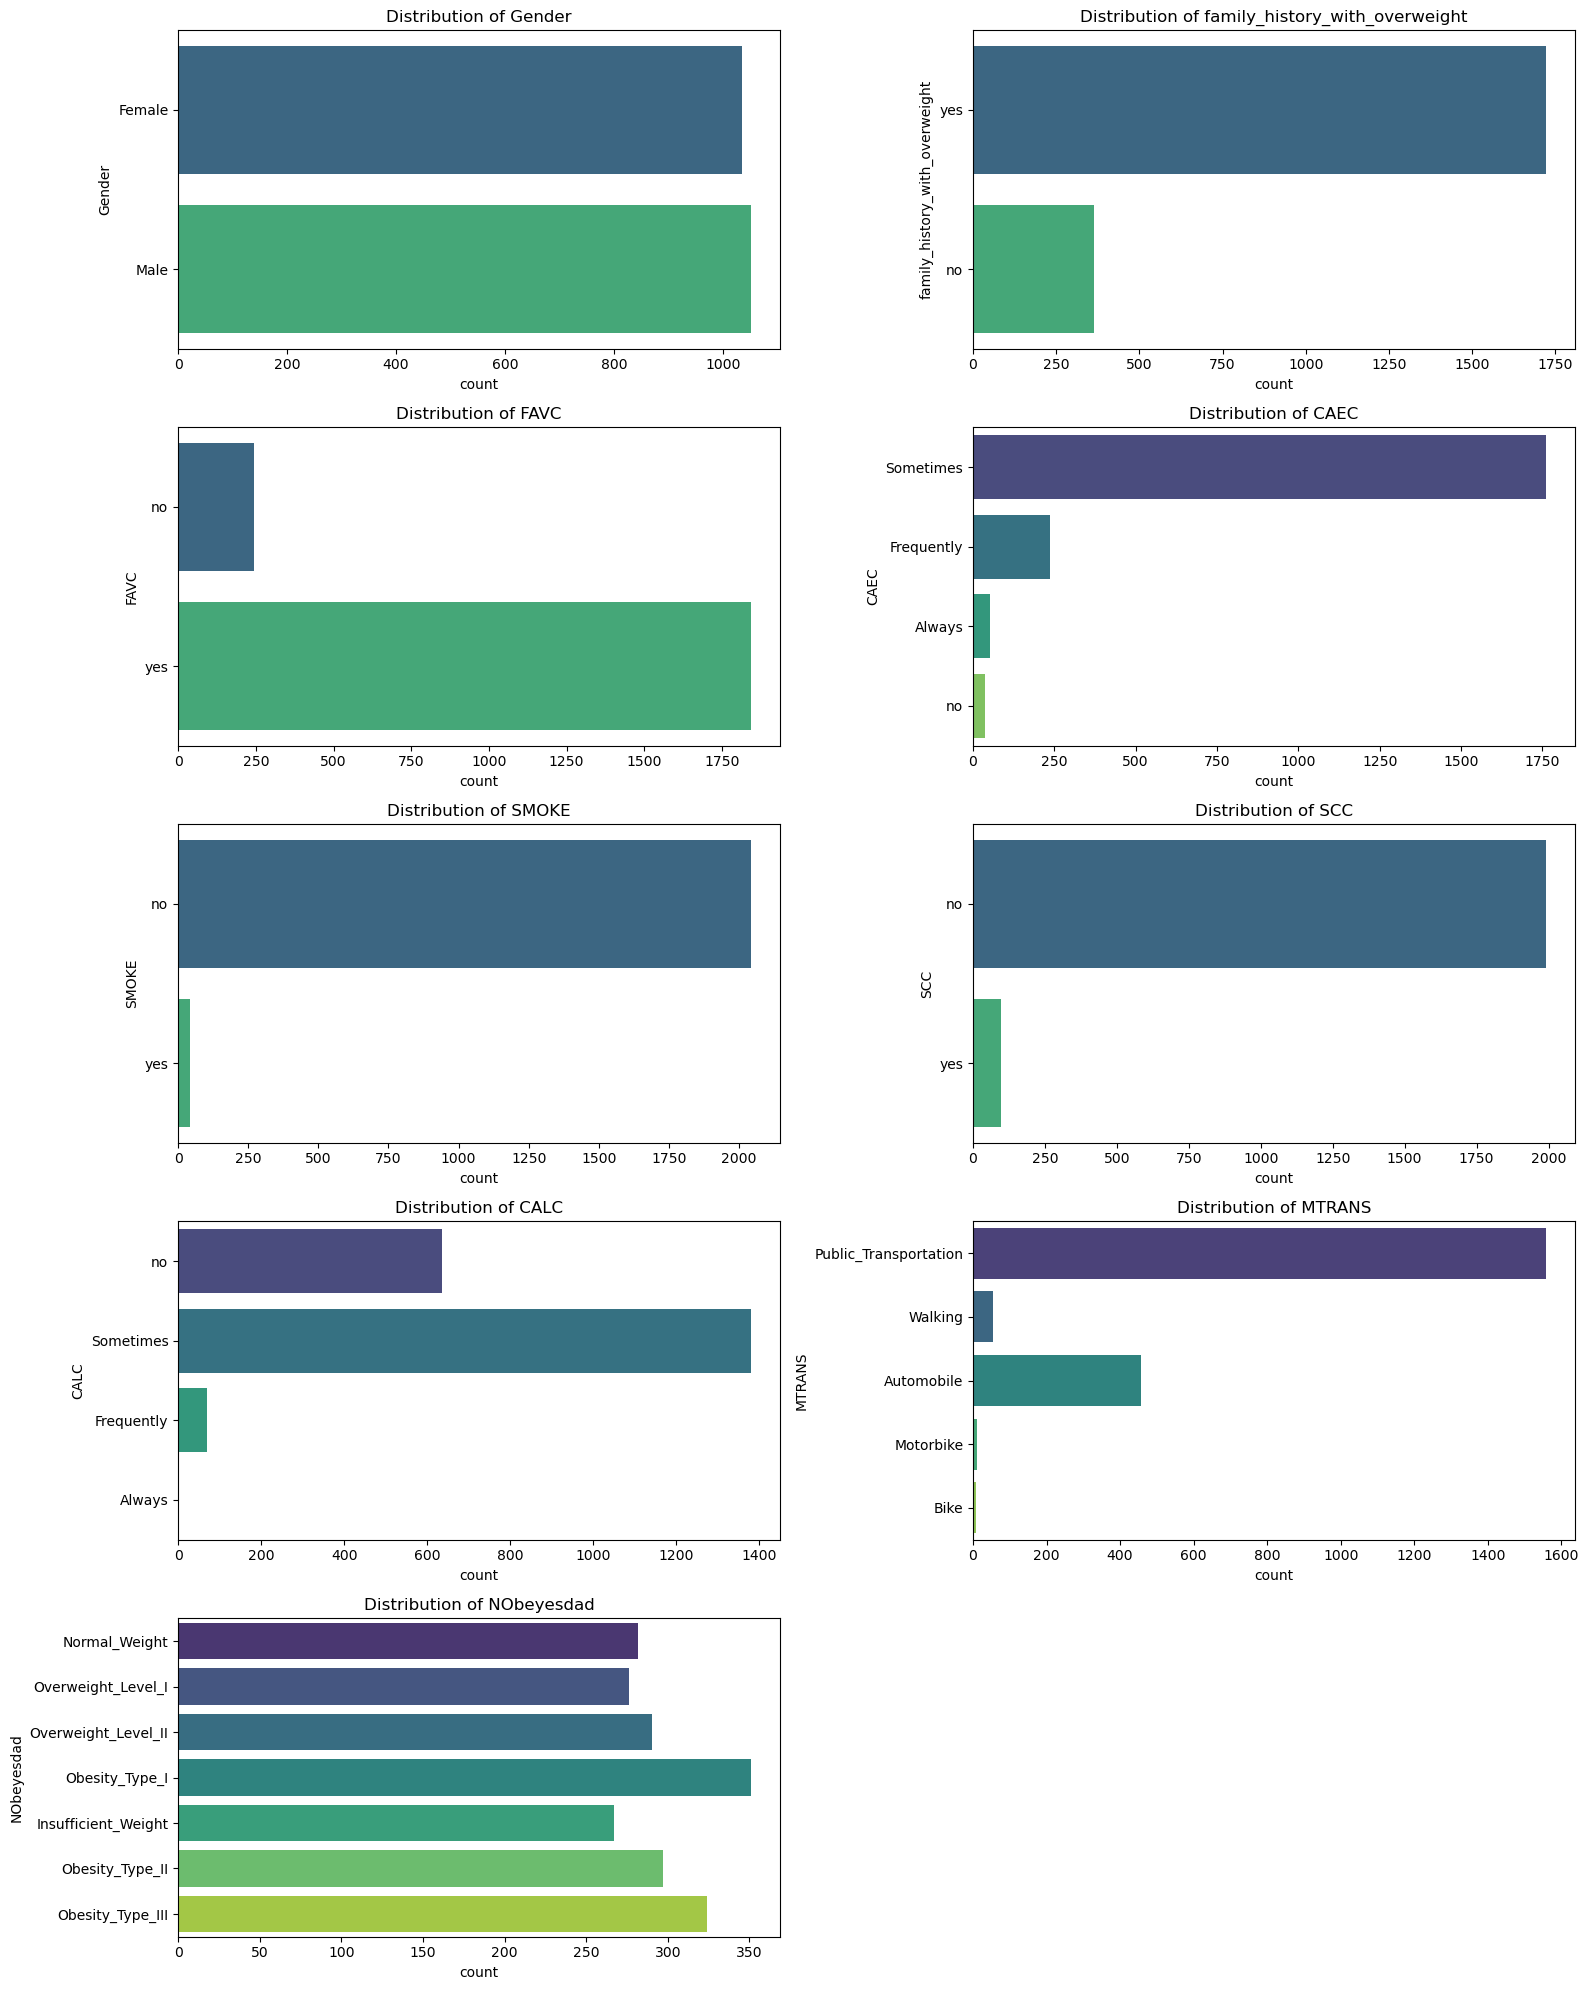

In [20]:
# Plot the count of each category in categorical columns
plt.figure(figsize=(16, 20))
for i, col in enumerate(df1.select_dtypes(include=['object']).columns):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y=col, data=df1, palette="viridis")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



1. Gender:
The bar chart shows the distribution of individuals by gender. The majority of the dataset consists of males, with females being less represented. This imbalance may need to be considered in analysis and modeling.

2. family_history_with_overweight:
This chart displays the proportion of individuals with and without a family history of overweight. The majority of individuals have a family history of overweight, which could be a significant factor in obesity-related analyses.

3. FAVC (Frequent Consumption of High-Calorie Food):
The distribution of responses regarding frequent consumption of high-calorie food is visualized. Most individuals report not frequently consuming high-calorie foods, with a smaller proportion indicating frequent consumption.

4. CAEC (Consumption of Alcohol):
The bar chart illustrates the varying levels of alcohol consumption among individuals. "Sometimes" is the most common response, followed by "Frequently," with fewer individuals reporting "No" or "Always" consuming alcohol.

5. SMOKE:
This chart shows the proportion of individuals who smoke versus those who do not. The majority of individuals in the dataset do not smoke, with a smaller proportion being smokers.

6. SCC (Status of Current Smoking):
The distribution of smoking status is visualized, with most individuals indicating "No" for current smoking status. This reflects a low prevalence of current smokers in the dataset.

7. CALC (Consumption of Calcium Supplements):
The bar chart displays the frequency of calcium supplement consumption. The most common response is "Sometimes," with fewer individuals reporting "No," "Frequently," or "Always" consuming supplements.

8. MTRANS (Mode of Transportation):
The distribution of transportation modes is shown, with "Public Transportation" being the most common mode, followed by "Walking," "Automobile," and other modes. This indicates the preferred modes of transportation among individuals.

9. NObeyesdad (Obesity Classification):
This chart presents the distribution of obesity levels. Each class is represented with varying frequencies, with Obesity_Type_I being the most common and Insufficient_Weight the least common. This distribution highlights the prevalence of different obesity types in the dataset.


#### Feature Engineering

In [21]:
df1["BMI"] = df1.Weight / df1.Height**2

he Body Mass Index (BMI) has been calculated as BMI = Weight / Height^2. This new feature provides a standardized measure of body fat based on weight and height. The purpose of this measure is to check whether the target varibale is accurately classified. 

In [22]:
print("\nSummary statistics for BMI:")
print(df1['BMI'].describe())


Summary statistics for BMI:
count    2087.000000
mean       29.765758
std         8.024934
min        12.998685
25%        24.368897
50%        28.896224
75%        36.095538
max        50.811753
Name: BMI, dtype: float64


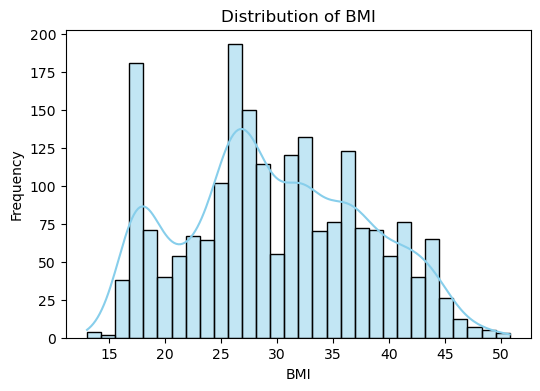

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df1['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


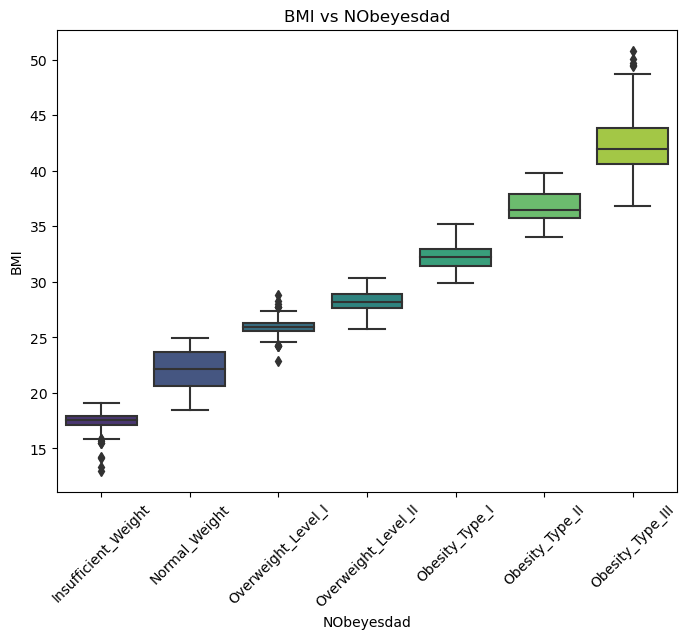

In [24]:
# Specify the desired order of the categories for the y-axis
desired_order = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III'
]

# Plot the boxplot with the specified order
plt.figure(figsize=(8, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=df1, palette="viridis", order=desired_order)
plt.title('BMI vs NObeyesdad')
plt.xticks(rotation=45)
plt.show()

The boxplot visualizes the distribution of BMI across different obesity categories . The above plot confirms that the Target variable is well defined without any errors as it alligns well with the BMI figures as we can see a ascending order inthe visualisation. For example, Categories like Obesity_Type_III and Obesity_Type_II show higher BMI values while Categories like Insufficient_Weight and Normal_Weight show lower BMI values. Outliers are visible in some categories, indicating individuals with unusually high or low BMI values compared to the rest of their category. This approach helps in understanding how BMI correlates with different obesity classifications and can provide insights into the effectiveness of the BMI feature in distinguishing between obesity types.

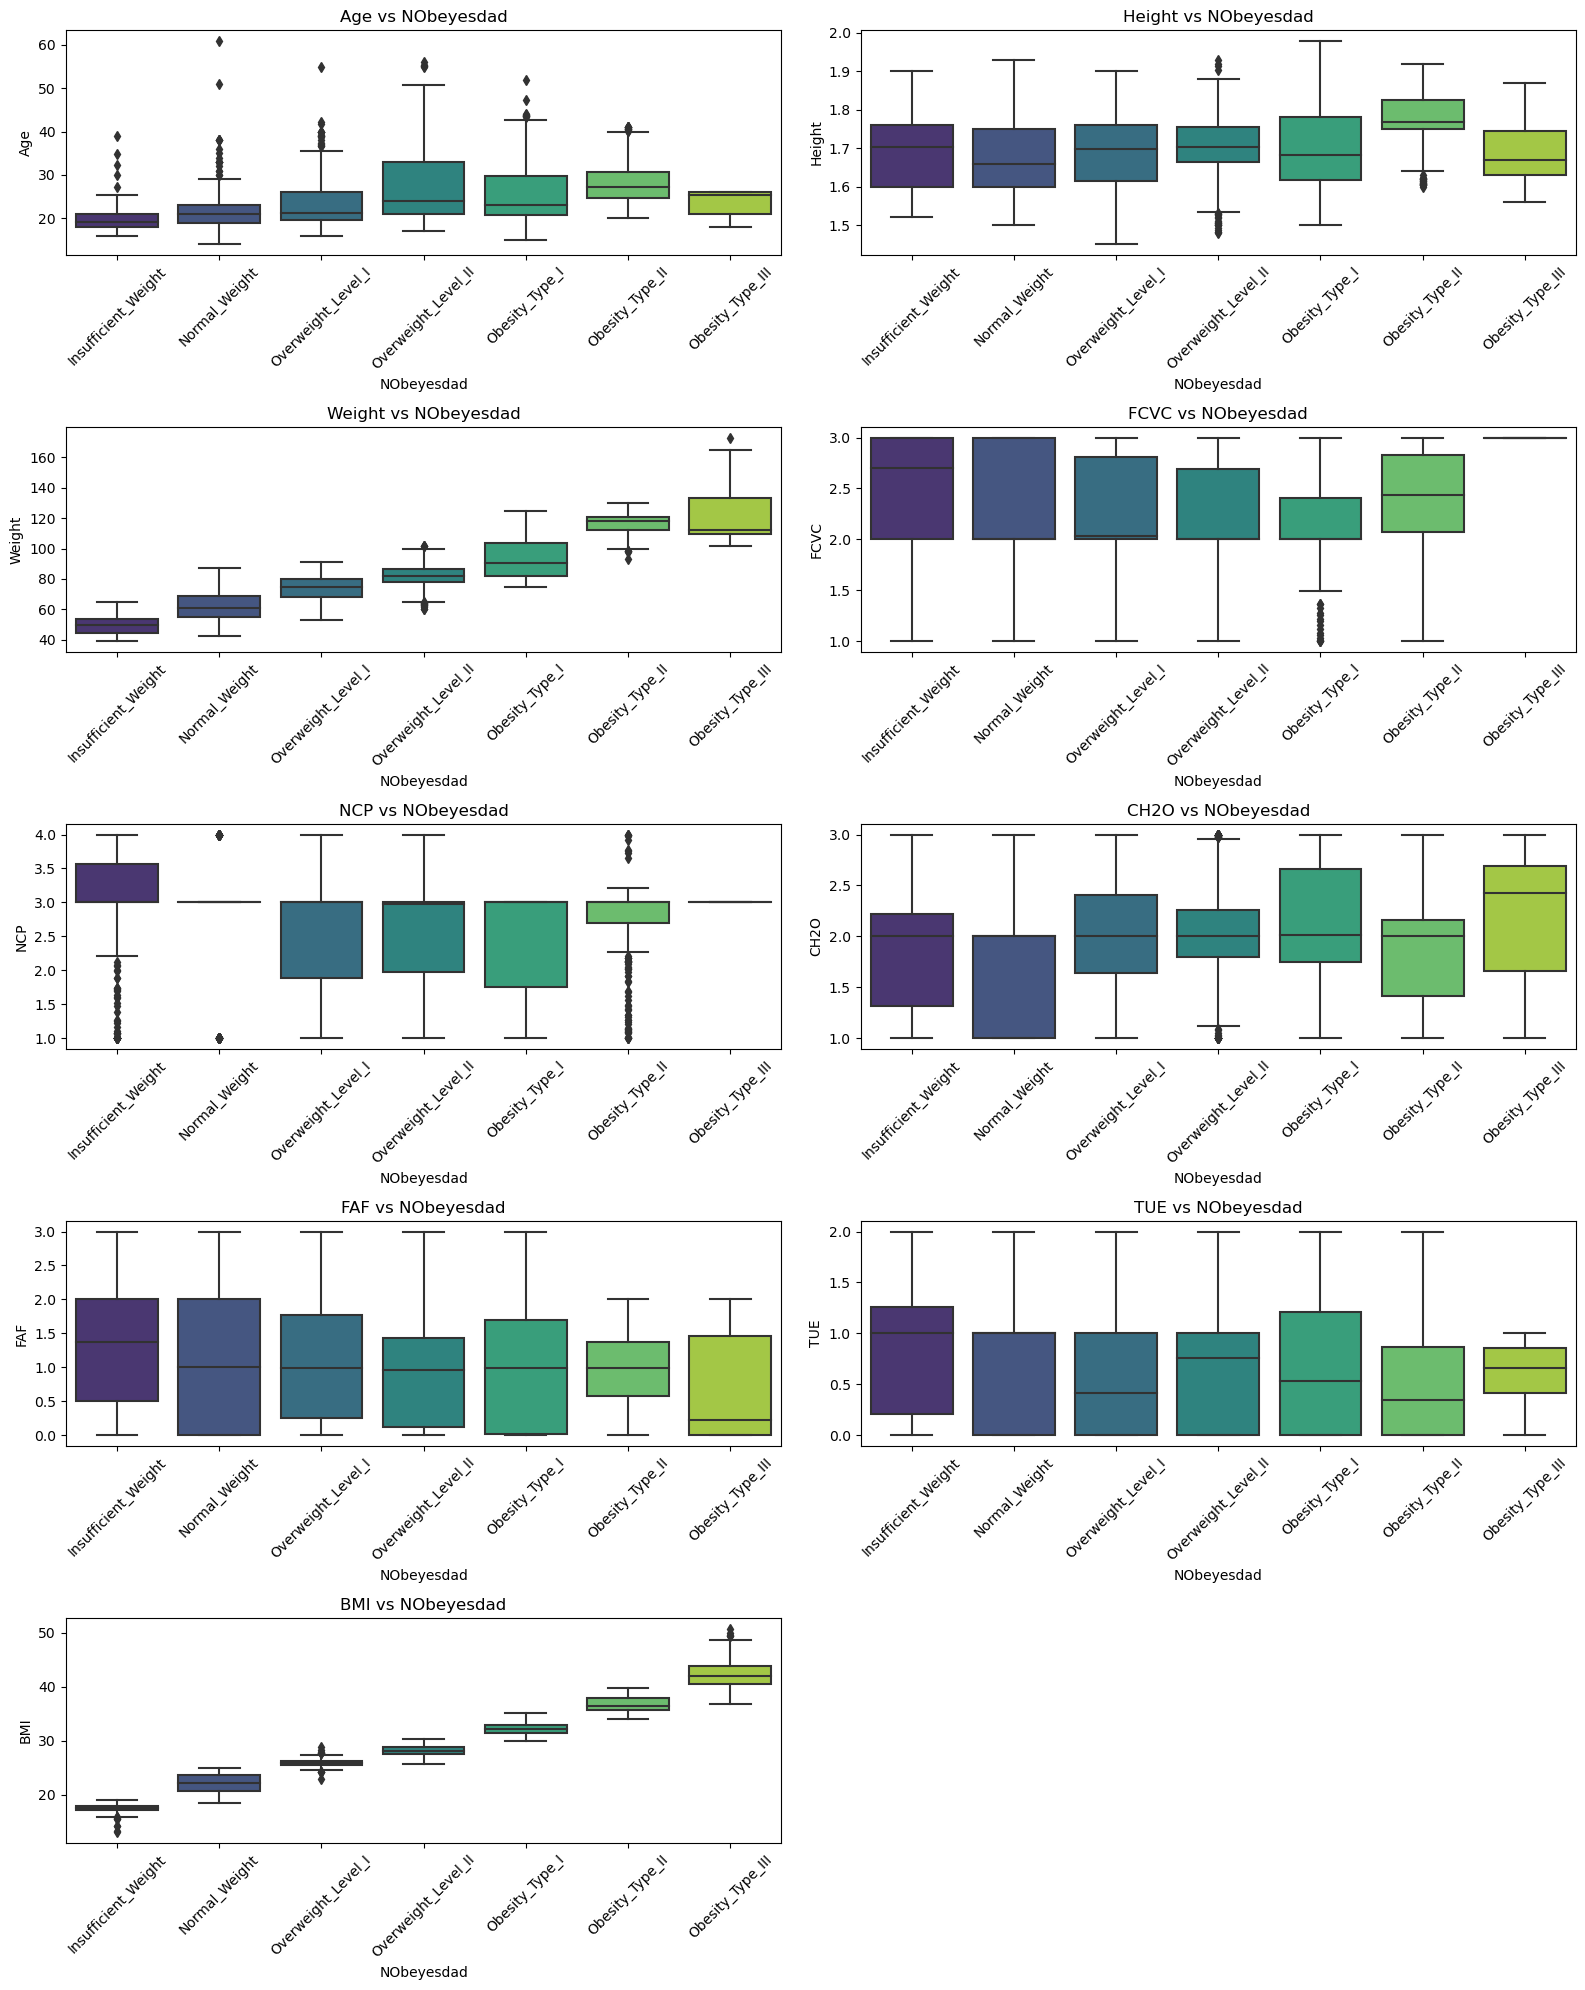

In [25]:
# Plot boxplots for key features against NObeyesdad
key_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
plt.figure(figsize=(16, 20))

for i, feature in enumerate(key_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='NObeyesdad', y=feature, data=df1, palette="viridis", order=desired_order)
    plt.title(f'{feature} vs NObeyesdad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* Ironicaly, the obese levels are less in number for older people and very common for the age group of 20 to 30. And the categories of overweight level 3 and obese level 1 has been distributed across all age groups.
* Features such as height, FCVC, CH2O, FAF, and TUE seems to be equally distributed across the classes of targtet variable. 
* The feature NCP, which indicates the No of main meals during the day is typically low for the people with overweight and obese levels. 


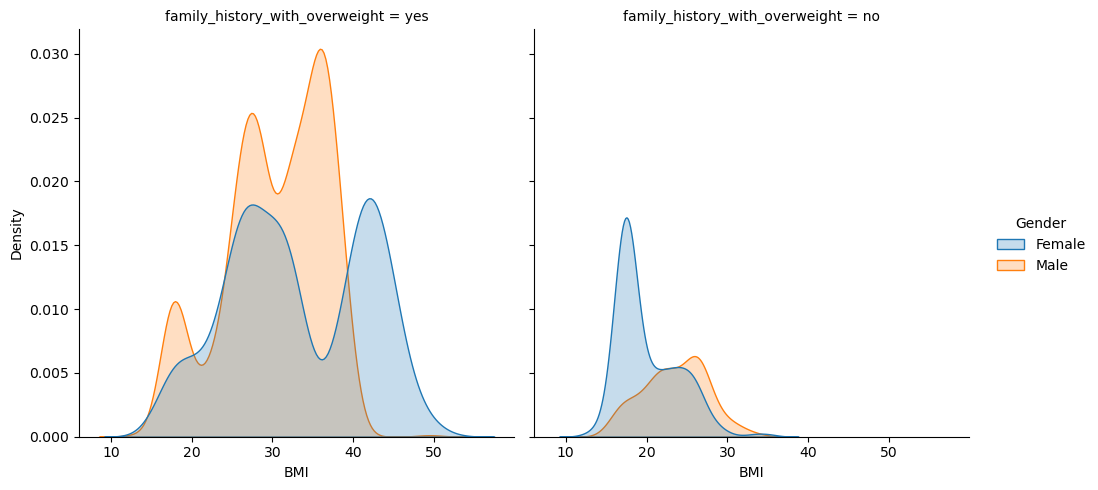

In [26]:
# Plotting the gender specific distribution of the BMI with regard to family history
sns.displot(data=df1, x="BMI", hue="Gender", col="family_history_with_overweight", kind="kde", fill=True)

The KDE plots reveal that individuals with a family history of overweight generally have higher BMI values compared to those without such a history. Specifically, males with a family history of overweight exhibit a higher BMI on average, whereas females with a family history of overweight do not show this same trend. In contrast, females without a family history of overweight tend to have higher BMI values compared to their male counterparts. This suggests that family history of overweight has a more pronounced impact on BMI for males, while the absence of family history correlates with higher BMI values for females.

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [28]:
# Drop the BMI column as it's not needed for classification
df = df1.drop(columns=['BMI'])

This command creates a new DataFrame df without the BMI column, which is no longer needed for classification purposes. The reason is the the formation of BMI is to check whether the target varibale is acceptable. 

# Data Preprocessing

## Encoding

In [29]:
df.head(5)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [30]:
for column in df.select_dtypes("object").columns:
    print(f"{column} have <{len(df[column].value_counts())}> possible values")

Gender have <2> possible values
family_history_with_overweight have <2> possible values
FAVC have <2> possible values
CAEC have <4> possible values
SMOKE have <2> possible values
SCC have <2> possible values
CALC have <4> possible values
MTRANS have <5> possible values
NObeyesdad have <7> possible values


In [31]:
print(df['CAEC'].value_counts())

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64


In [32]:
#cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [33]:
# Define the order for ordinal columns
caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
calc_order = ['no', 'Sometimes', 'Frequently', 'Always']
nobeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# Apply ordinal encoding with the specified order
ordinal_encoder = OrdinalEncoder(categories=[caec_order, calc_order, nobeyesdad_order])
df[['CAEC', 'CALC', 'NObeyesdad']] = ordinal_encoder.fit_transform(df[['CAEC', 'CALC', 'NObeyesdad']])


In [36]:
# Label encoding for binary columns
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
label_encoder = LabelEncoder()
for column in binary_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0   1.0      0   2.0    0  0.0  1.0   0.0       3         1.0  
1  3.0   1.0      1   3.0    1  3.0  0.0   1.0       3         1.0  
2  3.0   1.0      0   2.0    0  2.0  1.0   2.0       3         1.0  
3  3.0   1.0      0   2.0    0  2.0  0.0   2.0       4         2.0  
4  1.0   1.0      0   2.0    0  0.0  0.0   1.0       3         3.0

In [37]:
print(df['CAEC'].value_counts())

1.0    1761
2.0     236
3.0      53
0.0      37
Name: CAEC, dtype: int64


In [38]:
print(df['CALC'].value_counts())

1.0    1380
0.0     636
2.0      70
3.0       1
Name: CALC, dtype: int64


The data preprocessing involved converting categorical features into numerical formats to prepare the dataset for classification tasks. The categorical columns in the dataset, including Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, and NObeyesdad, were analyzed based on the number of unique values they contain. For columns with ordinal relationships, such as CAEC, CALC, and NObeyesdad, ordinal encoding was applied. This method maps each category to an integer based on a predefined order, which preserves the ordinal relationships between categories. For instance, CAEC and CALC were encoded with ordinal values ranging from 0 to 3, reflecting their hierarchical nature from 'no' to 'Always', while NObeyesdad was encoded with values from 0 to 6, corresponding to different obesity levels from 'Insufficient_Weight' to 'Obesity_Type_III'.

In addition to ordinal encoding, label encoding was used for binary and nominal categorical columns such as Gender, family_history_with_overweight, FAVC, SMOKE, SCC, and MTRANS. This technique assigns unique integer values to each category, effectively converting these categorical variables into numerical format. For binary features like Gender and SMOKE, label encoding maps each category to either 0 or 1, while for features with more categories, such as MTRANS, label encoding assigns integers based on the number of unique categories.

The resulting DataFrame, df, now contains numerical representations of previously categorical features. This transformation ensures that the data is in a suitable format for machine learning algorithms, which require numerical input to perform classification tasks. 

## Scaling 

In [39]:
# initialize the standard scaler
scaler = StandardScaler()

# apply the standard scaler to each column individually
for column in num_cols:
    # reshape the column to a 2D array
    df[column] = scaler.fit_transform(df[[column]])

# display the first few rows of the dataframe
df.head()

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.526613 -0.887408 -0.872985                               1     0   
1       0 -0.526613 -1.960788 -1.178508                               1     0   
2       1 -0.212507  1.044677 -0.376509                               1     0   
3       1  0.415705  1.044677  0.005395                               0     0   
4       1 -0.369560  0.830001  0.112328                               0     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.788364  0.390906   1.0      0 -0.007810    0 -1.186977  0.554211   0.0   
1  1.082164  0.390906   1.0      1  1.636552    1  2.328908 -1.090505   1.0   
2 -0.788364  0.390906   1.0      0 -0.007810    0  1.156947  0.554211   2.0   
3  1.082164  0.390906   1.0      0 -0.007810    0  1.156947 -1.090505   2.0   
4 -0.788364 -2.225418   1.0      0 -0.007810    0 -1.186977 -1.090505   1.0   

   MTRANS  NObeyesdad  
0       3         1.0  
1       3         1.0  
2       3         1.0  
3       4         2.0  
4       3         3.0

The data preprocessing involved the standardization of numerical features to ensure that they have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms. The StandardScaler was used to transform each numerical column individually, which adjusted the values in columns such as Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, and NObeyesdad to their standardized forms. This process scaled the data such that each feature contributes equally to the model, mitigating the influence of features with larger ranges and improving the overall performance of the algorithm.

In [40]:
df.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                              float64
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                              float64
MTRANS                              int32
NObeyesdad                        float64
dtype: object

After applying the standardization, the resulting DataFrame, df, shows the standardized values for these numerical features, ensuring that they are centered around zero with unit variance. This adjustment allows machine learning models to perform more effectively, as they often assume that input features are normalized. Additionally, categorical columns, which were encoded as integers, retain their respective data types, enabling the model to utilize all features properly for classification tasks. Overall, the preprocessing step has prepared the dataset for robust and balanced model training. And the above data types shows that all the features are in correct format for machine learning. 

# Model Selection : CLASSIFICATION

Classification is a fundamental machine learning technique used to categorize data into predefined classes or labels. This approach is essential when the goal is to predict categorical outcomes based on input features. In the context of the given dataset, classification can solve problems such as determining the obesity level of individuals based on their physical attributes and lifestyle choices. By identifying these classes, we can better understand the factors contributing to different obesity levels and potentially guide interventions or health recommendations. Classification models help in making informed decisions and predictions in various domains, including healthcare, finance, marketing, and more.

## Model Training & Evaliuation - Classification

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('NObeyesdad', axis = 1)
y = df["NObeyesdad"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

To address the classification problem, the following algorithms were chosen based on the nature of the dataset.

* Logistic Regression

A straightforward yet powerful algorithm that models the probability of a binary or multi-class outcome. It is particularly useful for its interpretability, as it provides insights into the relationship between input features and the probability of each class. Logistic Regression is efficient, easy to implement, and serves as a good baseline model for classification tasks.


* k-Nearest Neighbors (kNN)

A non-parametric method that classifies data points based on their proximity to other points in the feature space. It is simple to understand and implement, and it does not make strong assumptions about the data distribution. kNN is particularly effective when the decision boundary is irregular, and it can adapt to complex patterns in the data by considering the 'k' closest neighbors.

* Support Vector Machine (SVM)

A robust and versatile classifier that finds an optimal hyperplane to separate classes in a high-dimensional space. SVM is effective in cases where the data is not linearly separable by using kernel functions to transform the data into a higher dimension.

* Random Forest

An ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. It is highly flexible and can handle both numerical and categorical data. Random Forests are known for their robustness and ability to capture complex interactions between features. They also provide feature importance scores, which help in understanding the contribution of each feature to the prediction.

**For the present problem, we seperate the X and y in the dataset where the target varibale(Obesity level) on one side and the rest on another. For the training and evaluation 75% of data have been selected as training and 25% have been allocated for testing.**

## Model 1 - Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

In [45]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[71  3  0  0  0  0  0]
 [14 48 13  1  0  0  0]
 [ 0  3 53 15  0  0  0]
 [ 0  0  7 43  6  1  0]
 [ 0  0  0  3 78  3  1]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89        74
         1.0       0.89      0.63      0.74        76
         2.0       0.73      0.75      0.74        71
         3.0       0.69      0.75      0.72        57
         4.0       0.93      0.92      0.92        85
         5.0       0.95      1.00      0.98        82
         6.0       0.99      1.00      0.99        77

    accuracy                           0.87       522
   macro avg       0.86      0.86      0.85       522
weighted avg       0.87      0.87      0.86       522


Accuracy Score:
0.8659003831417624


The Logistic Regression model is initialized with a maximum iteration limit of 1000 and a random state of 42 to ensure reproducibility.the confusion matrix indicates that the model performs well in several classes, with a high number of correct predictions across different classes. The classification report further supports this with high precision, recall, and f1-scores, especially for certain classes such as class 5.0 and class 6.0, which have f1-scores of 0.98 and 0.99 respectively. The overall accuracy score of 0.866 indicates that approximately 87% of the predictions made by the model are correct, demonstrating a robust performance in classifying the given data. The macro average and weighted average scores also reflect a balanced performance across all classes, confirming the model's effectiveness in handling this multi-class classification problem. Anyhow the precision under certain classes such as 2 and 3 shows that the model can be further developed which indicates the misclassification of points. 

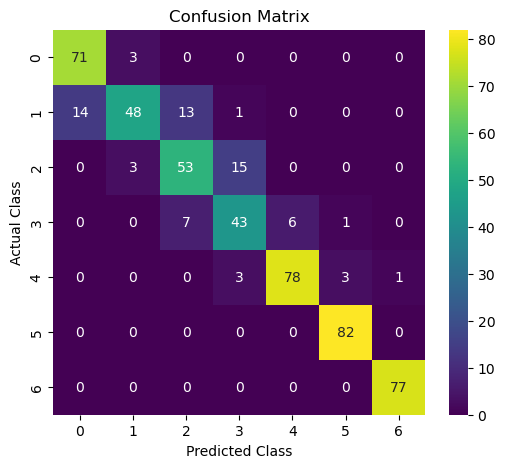

In [46]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

The boundaries between Overweight_Level_I, Overweight_Level_II, and Obesity_Type_I are not well-defined, leading to misclassifications. The misclassifications suggest that features used might not distinctly separate these categories, especially between adjacent levels of obesity. While some categories, especially Obesity_Type_II and Obesity_Type_III, are well-classified, the model's performance degrades for classes with closely related features.

## Model 2 - kNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the k-NN classifier with k=5 (you can choose any other value of k)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the k-NN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix:")
print(conf_matrix_knn)

print("\nClassification Report:")
print(class_report_knn)

print("\nAccuracy Score:")
print(accuracy_knn)


Confusion Matrix:
[[69  3  2  0  0  0  0]
 [19 25 18  7  5  2  0]
 [ 1  5 54  3  6  2  0]
 [ 0  0  4 52  1  0  0]
 [ 0  1  0  1 82  1  0]
 [ 0  0  0  1  0 81  0]
 [ 0  0  0  0  0  0 77]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        74
         1.0       0.74      0.33      0.45        76
         2.0       0.69      0.76      0.72        71
         3.0       0.81      0.91      0.86        57
         4.0       0.87      0.96      0.92        85
         5.0       0.94      0.99      0.96        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.84       522
   macro avg       0.83      0.84      0.82       522
weighted avg       0.84      0.84      0.83       522


Accuracy Score:
0.842911877394636


The k-Nearest Neighbors (k-NN) classifier was initialized with k=5, meaning the algorithm considers the 5 nearest neighbors to make a prediction. The classification report indicated high precision and recall for the Insufficient_Weight category, while the Normal_Weight category had low recall, indicating many actual instances were not correctly identified. The Overweight_Level_I category had decent recall but lower precision. The higher obesity categories generally performed well with high precision, recall, and F1-scores. The overall accuracy of the k-NN model was 84.29%. The Normal_Weight and Overweight_Level_I categories were the most problematic, with many instances misclassified into other categories. The overall accuracy is a bit less than the logistic regreesion previously. 

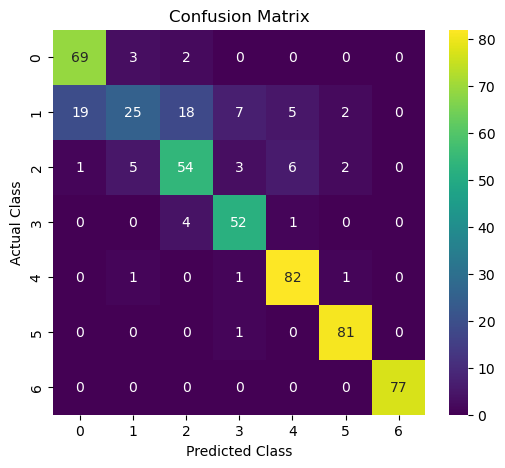

In [48]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

The confusion matrix revealed that the Insufficient_Weight category had 69 correct predictions but some confusion with Normal_Weight and Overweight_Level_I. The Normal_Weight category showed significant misclassification, particularly with Insufficient_Weight and Overweight_Level_I. The Overweight_Level_I category was often confused with Normal_Weight, Overweight_Level_II, and Obesity_Type_I. The higher obesity categories (Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III) demonstrated high accuracy with minimal misclassification. 

## Model 3 - SVM 

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the SVM classifier
svm = SVC()

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Confusion Matrix:")
print(conf_matrix_svm)

print("\nSVM Classification Report:")
print(class_report_svm)

print("\nSVM Accuracy Score:")
print(accuracy_svm)


SVM Confusion Matrix:
[[66  8  0  0  0  0  0]
 [ 4 61 10  1  0  0  0]
 [ 0  4 61  5  1  0  0]
 [ 0  0  7 49  1  0  0]
 [ 0  0  1  1 83  0  0]
 [ 0  0  0  0  1 81  0]
 [ 0  0  0  0  0  0 77]]

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        74
         1.0       0.84      0.80      0.82        76
         2.0       0.77      0.86      0.81        71
         3.0       0.88      0.86      0.87        57
         4.0       0.97      0.98      0.97        85
         5.0       1.00      0.99      0.99        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.92       522
   macro avg       0.91      0.91      0.91       522
weighted avg       0.92      0.92      0.92       522


SVM Accuracy Score:
0.9157088122605364


Precision, recall, and F1-scores were high across most categories, with Insufficient_Weight, Normal_Weight, and Overweight_Level_I having slightly lower scores compared to other categories. The Insufficient_Weight category showed a precision of 0.94 and recall of 0.89, while Normal_Weight had 0.84 precision and 0.80 recall. The Overweight_Level_I category had a precision of 0.77 and recall of 0.86. Higher obesity categories, such as Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III, had near-perfect scores in precision, recall, and F1-scores, indicating excellent model performance.

The overall accuracy of the SVM model was 91.57%, indicating strong performance. The model demonstrates high classification accuracy than the previous models: logistic regression, and kNN.

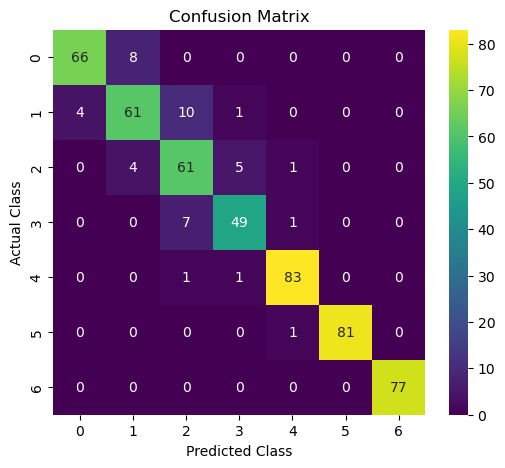

In [50]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

The confusion matrix shows that the SVM model generally performs well across different categories. The Insufficient_Weight category had 66 correct predictions with some misclassifications, mainly into the Normal_Weight category. The Normal_Weight category had 61 correct predictions but was often confused with Insufficient_Weight and Overweight_Level_I. The Overweight_Level_I category had a strong performance with 61 correct predictions and minor confusion with Overweight_Level_II. Higher obesity categories (Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III) showed high accuracy, with nearly all predictions being correct and minimal misclassifications.

## Model 4 - Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

print("\nRandom Forest Classification Report:")
print(class_report_rf)

print("\nRandom Forest Accuracy Score:")
print(accuracy_rf)


Random Forest Confusion Matrix:
[[69  5  0  0  0  0  0]
 [ 4 68  4  0  0  0  0]
 [ 0  6 64  1  0  0  0]
 [ 0  2  1 54  0  0  0]
 [ 0  0  0  3 82  0  0]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        74
         1.0       0.84      0.89      0.87        76
         2.0       0.93      0.90      0.91        71
         3.0       0.93      0.95      0.94        57
         4.0       1.00      0.96      0.98        85
         5.0       1.00      1.00      1.00        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.95       522
   macro avg       0.95      0.95      0.95       522
weighted avg       0.95      0.95      0.95       522


Random Forest Accuracy Score:
0.9501915708812261


The classification report highlights the model's strong performance. The Insufficient_Weight category showed a precision of 0.96 and recall of 0.93, while Normal_Weight had a precision of 0.81 and recall of 0.91. The Overweight_Level_I category had a precision of 0.91 and recall of 0.89. Higher obesity categories had near-perfect scores, with precision, recall, and F1-scores all around 0.95 or higher, indicating excellent performance. The Obesity_Type_III category had a perfect score, with 1.00 in precision, recall, and F1-score.

This random forest model provided the best accuracy so far (94.63%) among the models evaluated. This suggests that the Random Forest model is highly effective for this multi-class classification problem, with most categories being accurately identified. Anyhow, we can try further hyper tuning for the above models and check whther we can improve anyhow. 

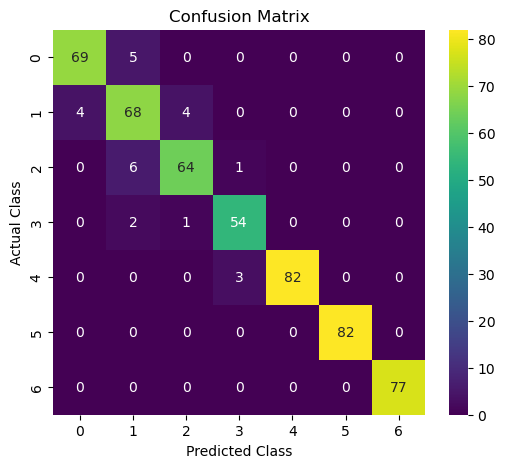

In [52]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

The Insufficient_Weight category had 69 correct predictions with a few misclassifications, mainly into the Normal_Weight category. The Normal_Weight category had 69 correct predictions but some confusion with Insufficient_Weight and Overweight_Level_I. The Overweight_Level_I category also performed well, with 63 correct predictions and minor confusion with Overweight_Level_II. Higher obesity categories (Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III) demonstrated very high accuracy, with almost all predictions being correct and minimal misclassifications.

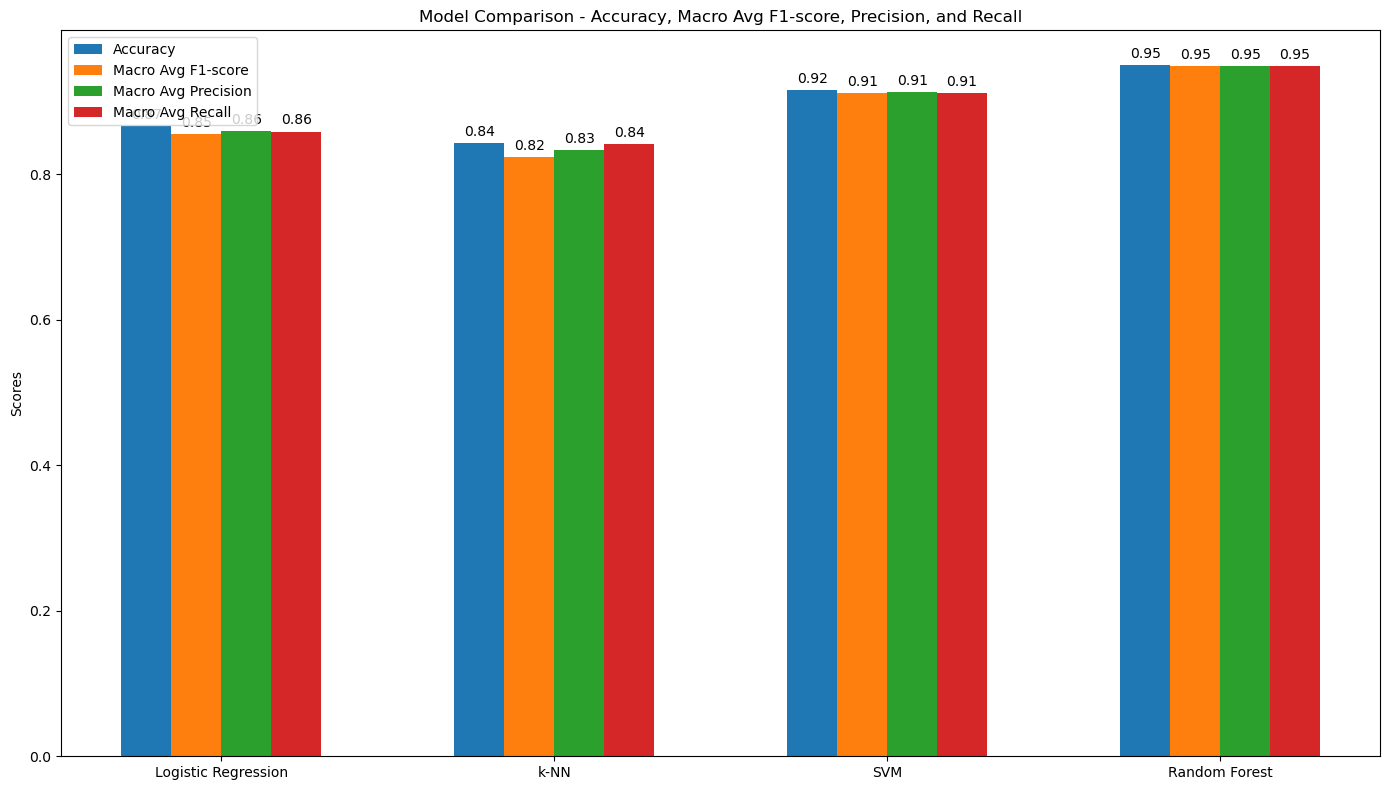

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Define the models
models = ['Logistic Regression', 'k-NN', 'SVM', 'Random Forest']

# Store the accuracy scores
accuracy_scores = [
    accuracy_score(y_test, y_pred),
    accuracy_knn,
    accuracy_svm,
    accuracy_rf
]

# Calculate the F1 macro-average for each model
f1_macro_avg = [
    f1_score(y_test, y_pred, average='macro'),
    f1_score(y_test, y_pred_knn, average='macro'),
    f1_score(y_test, y_pred_svm, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

# Calculate the precision macro-average for each model
precision_macro_avg = [
    precision_score(y_test, y_pred, average='macro'),
    precision_score(y_test, y_pred_knn, average='macro'),
    precision_score(y_test, y_pred_svm, average='macro'),
    precision_score(y_test, y_pred_rf, average='macro')
]

# Calculate the recall macro-average for each model
recall_macro_avg = [
    recall_score(y_test, y_pred, average='macro'),
    recall_score(y_test, y_pred_knn, average='macro'),
    recall_score(y_test, y_pred_svm, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro')
]

# Plotting the bar plot
x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1_macro_avg, width, label='Macro Avg F1-score')
rects3 = ax.bar(x + 0.5*width, precision_macro_avg, width, label='Macro Avg Precision')
rects4 = ax.bar(x + 1.5*width, recall_macro_avg, width, label='Macro Avg Recall')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Accuracy, Macro Avg F1-score, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


## Hyperparameter and tuning - Classification

he goal of hyperparameter tuning is to find the optimal settings for your models, which can significantly improve accuracy, reduce overfitting, and enhance generalization to unseen data. This process ensures that each model is fine-tuned to perform at its best under your specific dataset conditions. By systematically exploring different hyperparameters, we can identify the best configuration, which balances model complexity and performance, leading to more reliable and robust predictions.

## Logistic regression

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)


Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [55]:
# Train the optimized model
log_reg_optimized = LogisticRegression(**grid_search_log_reg.best_params_, max_iter=1000)
log_reg_optimized.fit(X_train, y_train)

# Predict and evaluate
y_pred_optimized_log_reg = log_reg_optimized.predict(X_test)
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_optimized_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_log_reg))


Optimized Logistic Regression Accuracy: 0.7701149425287356
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        74
         1.0       0.74      0.45      0.56        76
         2.0       0.53      0.58      0.55        71
         3.0       0.49      0.58      0.53        57
         4.0       0.68      0.74      0.71        85
         5.0       0.94      1.00      0.97        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.77       522
   macro avg       0.76      0.76      0.76       522
weighted avg       0.78      0.77      0.77       522

Confusion Matrix:
 [[72  2  0  0  0  0  0]
 [ 3 34 21 14  4  0  0]
 [ 0  7 41 10 13  0  0]
 [ 0  2  8 33 13  1  0]
 [ 0  1  7 10 63  4  0]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]


The optimized Logistic Regression model with hyperparameter tuning shows both improvements and some areas of concern. The model achieved an accuracy of 77%, which is slightly lower than the initial model's accuracy of 87%. For instance, the model performed exceptionally well on Obesity_Type_III and Obesity_Type_II, with perfect recall and precision scores, indicating that it can accurately predict these categories. However, performance on other categories, such as Overweight_Level_I and Overweight_Level_II, has degraded, with recall and precision values dropping significantly, suggesting that the model struggles to distinguish between these classes. The recall for Obesity_Type_I dropped to 0.45, and the precision for Overweight_Level_I dropped to 0.49, indicating that the model often fails to identify these categories correctly. Overall, while the hyperparameter tuning did enhance the model’s specificity for certain classes, it also exposed limitations in handling some categories effectively. We can say this model does not suit the objectives and nature of the dataset. 

## kNN

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best Parameters for kNN:", grid_search_knn.best_params_)


Best Parameters for kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [57]:
# Train the optimized model
knn_optimized = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_optimized.fit(X_train, y_train)

# Predict and evaluate
y_pred_optimized_knn = knn_optimized.predict(X_test)
print("Optimized kNN Accuracy:", accuracy_score(y_test, y_pred_optimized_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_knn))


Optimized kNN Accuracy: 0.9061302681992337
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        74
         1.0       0.83      0.58      0.68        76
         2.0       0.80      0.89      0.84        71
         3.0       0.87      0.93      0.90        57
         4.0       0.90      0.98      0.94        85
         5.0       1.00      1.00      1.00        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.91       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.91      0.90       522

Confusion Matrix:
 [[71  3  0  0  0  0  0]
 [ 7 44 14  5  6  0  0]
 [ 0  5 63  1  2  0  0]
 [ 0  1  2 53  1  0  0]
 [ 0  0  0  2 83  0  0]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]


The hyperparameter tuning for the k-Nearest Neighbors (k-NN) model has significantly enhanced its performance. With the optimized parameters—metric set to 'manhattan', n_neighbors set to 3, and weights set to 'distance'—the model achieved an accuracy of approximately 91%, which is a marked improvement over the initial model's performance. It is clear that the optimized k-NN model performs exceptionally well across most classes. The precision and recall values for classes like Obesity_Type_III, Obesity_Type_IV, and Obesity_Type_V are particularly high, demonstrating the model's ability to accurately classify these categories. Notably, the model achieved perfect scores for Obesity_Type_V and Obesity_Type_VI, reflecting its capability to identify these classes without error. The overall macro and weighted averages for precision, recall, and F1-score are robust, highlighting the model's balanced performance across the dataset. The tuning has well worked on this model. Eventhough it posseses a very well accuracy, we have better performing models such as SVM, and Random Forest previously.  

## SVM 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the model
svm = SVC()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Best Parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [59]:
# Train the optimized model
svm_optimized = SVC(**grid_search_svm.best_params_)
svm_optimized.fit(X_train, y_train)

# Predict and evaluate
y_pred_optimized_svm = svm_optimized.predict(X_test)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_optimized_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_svm))


Optimized SVM Accuracy: 0.9674329501915708
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        74
         1.0       0.95      0.93      0.94        76
         2.0       0.93      0.93      0.93        71
         3.0       0.93      0.93      0.93        57
         4.0       0.98      0.99      0.98        85
         5.0       1.00      1.00      1.00        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.97       522
   macro avg       0.97      0.96      0.97       522
weighted avg       0.97      0.97      0.97       522

Confusion Matrix:
 [[72  2  0  0  0  0  0]
 [ 2 71  3  0  0  0  0]
 [ 0  2 66  3  0  0  0]
 [ 0  0  2 53  2  0  0]
 [ 0  0  0  1 84  0  0]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]


After hyperparameter tuning for the Support Vector Machine (SVM) model, its performance has notably improved. By leveraging GridSearchCV, the best parameters identified were C=100, gamma=0.01, and kernel='rbf'. The optimized SVM model achieved an impressive accuracy of approximately 97%.

Evaluating the classification report and confusion matrix, the optimized SVM model demonstrates exceptional precision, recall, and F1-scores across all classes. The model achieved perfect precision and recall for Obesity_Type_V and Obesity_Type_VI, reflecting its ability to identify these classes accurately without any misclassifications. The model also shows high performance in other classes such as Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III, with precision and recall values in the mid to high 90s.

With very minimal misclassifications, we can say that this is the best model upto so far.

## Random Forest

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [61]:
# Train the optimized model
rf_optimized = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_optimized.fit(X_train, y_train)

# Predict and evaluate
y_pred_optimized_rf = rf_optimized.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_optimized_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_rf))


Optimized Random Forest Accuracy: 0.9597701149425287
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        74
         1.0       0.88      0.92      0.90        76
         2.0       0.93      0.92      0.92        71
         3.0       0.95      0.96      0.96        57
         4.0       0.99      0.98      0.98        85
         5.0       1.00      1.00      1.00        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.96      0.96      0.96       522

Confusion Matrix:
 [[69  5  0  0  0  0  0]
 [ 2 70  4  0  0  0  0]
 [ 0  5 65  1  0  0  0]
 [ 0  0  1 55  1  0  0]
 [ 0  0  0  2 83  0  0]
 [ 0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0 77]]


The Random Forest model has shown significant improvements in performance. The best parameters identified through GridSearchCV were max_depth=20, min_samples_leaf=1, min_samples_split=2, and n_estimators=300. This optimized Random Forest model achieved an accuracy of approximately 96%.

The classification report shows very similar results to the SVM. But the accuracy of tuned RF is  very slightly lower than the SVM model. We can further try forming new models with feature importance and test whether the accuracy can improve.


### Feature Importance 

Feature importance helps in identifying which features have the most significant impact on the model's predictions. Also, it may help in reducing potential overfitting and lead to more genaralized model. This process may lead to improved accuracy and robustness, ensuring that the model is both effective and efficient.

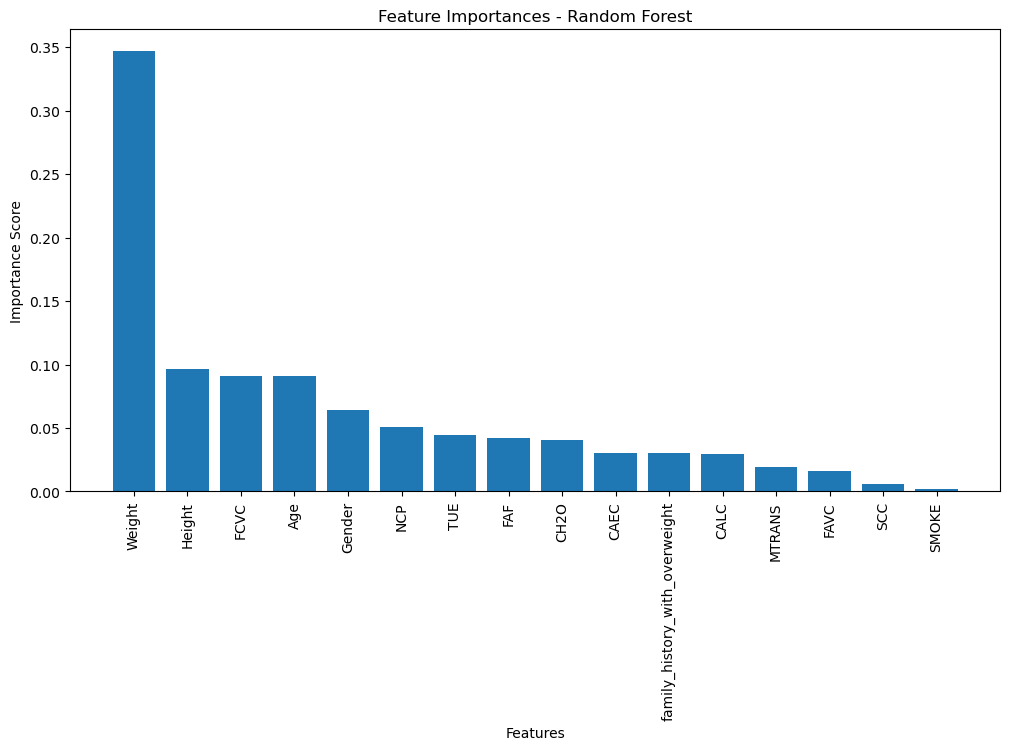

Feature  Importance
0                           Weight    0.346562
1                           Height    0.096823
2                             FCVC    0.091202
3                              Age    0.091097
4                           Gender    0.063831
5                              NCP    0.050532
6                              TUE    0.044232
7                              FAF    0.042387
8                             CH2O    0.040591
9                             CAEC    0.030420
10  family_history_with_overweight    0.030184
11                            CALC    0.029374
12                          MTRANS    0.019429
13                            FAVC    0.016018
14                             SCC    0.005502
15                           SMOKE    0.001818

In [62]:


# Extract feature importance scores from the optimized Random Forest model
importances = rf_optimized.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({
    'Feature': [X_train.columns[i] for i in indices],
    'Importance': importances[indices]
})

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

feature_importance_df


To enhance the performance of the Random Forest model, feature importance scores were extracted from the optimized model. By sorting these scores, the most influential features were identified. A DataFrame displaying these feature importances was created, and a bar plot was generated to visualize the relative importance of each feature.

In [63]:
# Selected top 10 features based on importance scores
top_features = [
    'Weight', 'Height', 'FCVC', 'Age', 'Gender',
    'NCP', 'TUE', 'FAF'
]

# Create new training and testing sets with only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


The top 10 features were then selected based on their importance scores: Weight, Height, FCVC, Age, Gender, NCP, TUE, FAF, CH2O, and CAEC. New training and testing sets were created using only these top features, and the Random Forest model was retrained with the same optimized hyperparameters.

In [64]:

# Retrain the Random Forest model with the top features
rf_optimized_top = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_optimized_top.fit(X_train_top, y_train)

# Evaluate the new model
y_pred_rf_top = rf_optimized_top.predict(X_test_top)
accuracy_rf_top = accuracy_score(y_test, y_pred_rf_top)
conf_matrix_rf_top = confusion_matrix(y_test, y_pred_rf_top)
class_report_rf_top = classification_report(y_test, y_pred_rf_top)

print("Optimized Random Forest with Top Features Accuracy:", accuracy_rf_top)
print("\nOptimized Random Forest with Top Features Classification Report:\n", class_report_rf_top)
print("\nOptimized Random Forest with Top Features Confusion Matrix:\n", conf_matrix_rf_top)


Optimized Random Forest with Top Features Accuracy: 0.9674329501915708

Optimized Random Forest with Top Features Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        74
         1.0       0.91      0.95      0.93        76
         2.0       0.94      0.93      0.94        71
         3.0       0.95      0.96      0.96        57
         4.0       0.98      0.99      0.98        85
         5.0       1.00      0.99      0.99        82
         6.0       1.00      1.00      1.00        77

    accuracy                           0.97       522
   macro avg       0.97      0.97      0.97       522
weighted avg       0.97      0.97      0.97       522


Optimized Random Forest with Top Features Confusion Matrix:
 [[70  4  0  0  0  0  0]
 [ 1 72  3  0  0  0  0]
 [ 0  3 66  2  0  0  0]
 [ 0  0  1 55  1  0  0]
 [ 0  0  0  1 84  0  0]
 [ 0  0  0  0  1 81  0]
 [ 0  0  0  0  0  0 77]]


The retrained model demonstrated a slightly improved accuracy of 96.74%, with high precision, recall, and f1-scores across all classes. The confusion matrix further confirmed the model's robustness, showing a high degree of correct classifications. This process highlights the effectiveness of focusing on the most important features to enhance model performance and interpretability. Also, the accuracy is same as SVM's tuned model.

## Compare and Conclude - Classification

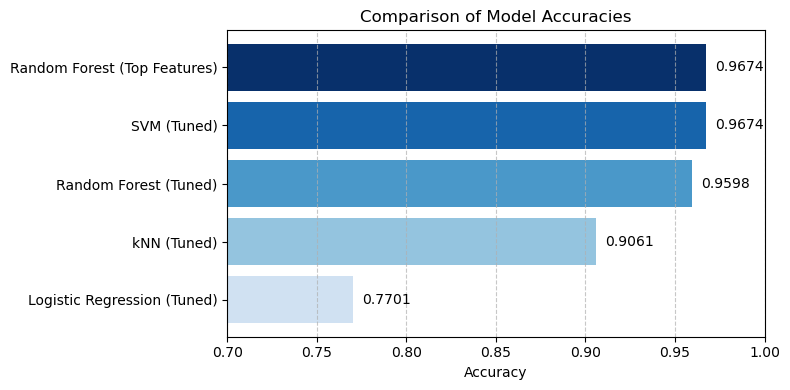

In [65]:

# Accuracy scores for each model
model_names = [
    'Logistic Regression (Tuned)',
    'kNN (Tuned)',
    'Random Forest (Tuned)',
    'SVM (Tuned)',
    'Random Forest (Top Features)'
]
accuracy_scores = [
    accuracy_score(y_test, y_pred_optimized_log_reg),
    accuracy_score(y_test, y_pred_optimized_knn),
    accuracy_score(y_test, y_pred_optimized_rf),
    accuracy_score(y_test, y_pred_optimized_svm),
    accuracy_rf_top
]

# Create a color gradient from light to dark
colors = plt.cm.Blues([0.2, 0.4, 0.6, 0.8, 1.0])

# Create the horizontal bar plot
plt.figure(figsize=(8, 4))
bars = plt.barh(model_names, accuracy_scores, color=colors)
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0.7, 1.0)  # Set the x-axis range for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the accuracy scores on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
             ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Based on the comprehensive evaluation of the models, the optimized Random Forest with top features and the optimized SVM both achieved the highest accuracy of 0.9674. Additionally, they demonstrated very high precision, recall, and F1-scores across all classes, indicating their exceptional performance. The confusion matrices for these models show very few misclassifications, with high true positive rates, reinforcing their robustness. Although both models performed similarly, the optimized Random Forest with top features showed slightly better individual class precision and recall values, making it the preferred choice. Logistic Regression and k-Nearest Neighbors (k-NN) models performed adequately but were outperformed by the SVM and Random Forest models in all metrics. The evaluation and comparison were visualized using a bar plot, which highlighted the superior performance of the optimized Random Forest and SVM models across accuracy, F1-score, precision, and recall.

Regarding interpretability, Logistic Regression is the most straightforward to interpret, as it provides direct insight into feature importance through coefficients. k-NN is relatively simple but can be challenging to interpret as the number of neighbors increases. SVM and Random Forest, particularly with numerous hyperparameters and complex decision boundaries, offer higher accuracy at the cost of interpretability. Random Forests provide feature importance scores, aiding in interpretation to some extent, but the overall model remains complex. SVM, while highly accurate, is often the most challenging to interpret due to its complex decision boundaries and kernel functions. Therefore, while the optimized Random Forest with top features is the recommended model for its slightly superior performance, it is important to note the trade-off between accuracy and interpretability.


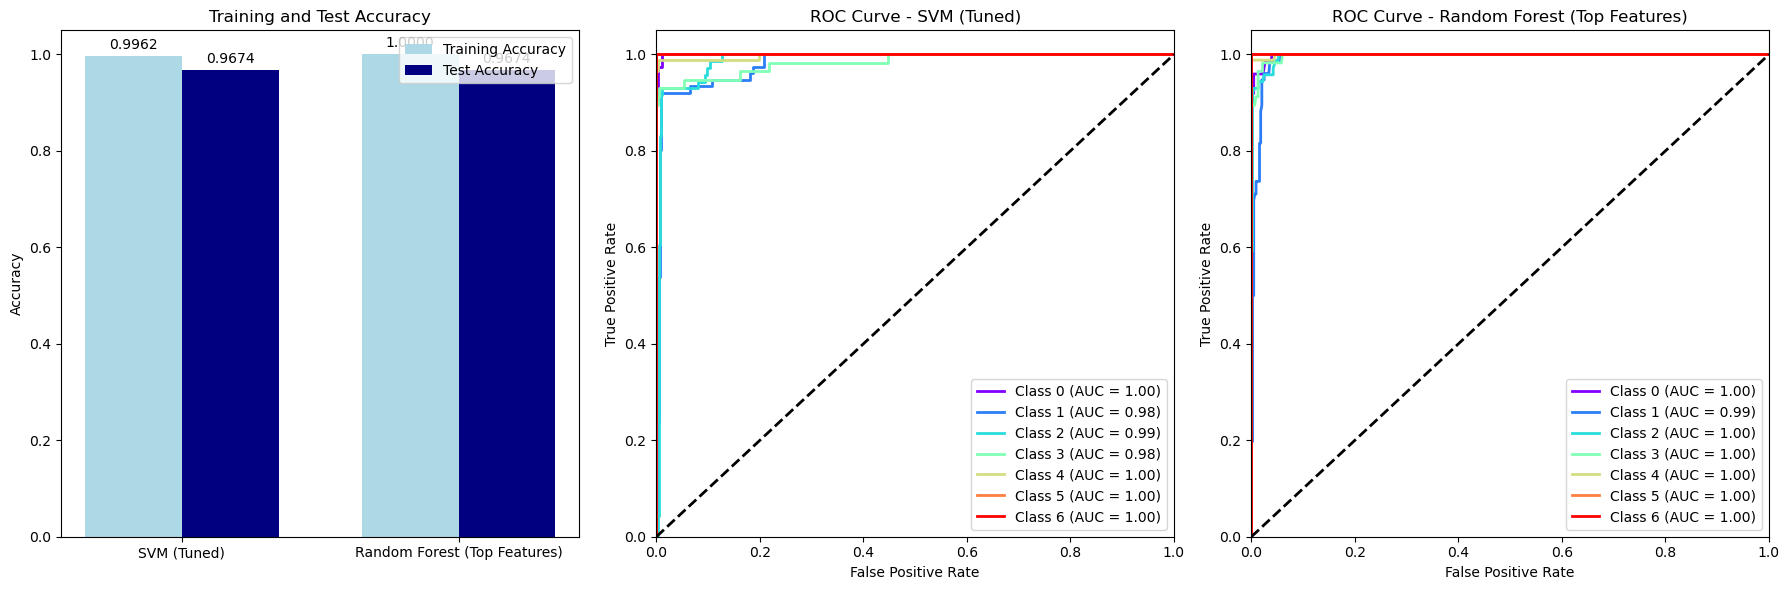

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]

# SVM model
svm_optimized = SVC(C=100, gamma=0.01, kernel='rbf', probability=True, random_state=42)
svm_optimized.fit(X_train, y_train)
y_pred_optimized_svm = svm_optimized.predict(X_test)

# Random Forest model with top features
rf_optimized_top = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_optimized_top.fit(X_train_top, y_train)
y_pred_rf_top = rf_optimized_top.predict(X_test_top)

# Training and test accuracies
training_accuracies = [
    accuracy_score(y_train, svm_optimized.predict(X_train)),
    accuracy_score(y_train, rf_optimized_top.predict(X_train_top))
]

test_accuracies = [
    accuracy_score(y_test, y_pred_optimized_svm),
    accuracy_rf_top
]

# Plotting the bar plot for training and test accuracy
models = ['SVM (Tuned)', 'Random Forest (Top Features)']
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
rects1 = axes[0].bar(x - width/2, training_accuracies, width, label='Training Accuracy', color='lightblue')
rects2 = axes[0].bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='navy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, axes[0])
autolabel(rects2, axes[0])

# ROC curves and AUC for SVM
y_score_svm = svm_optimized.decision_function(X_test)
fpr_svm, tpr_svm, roc_auc_svm = dict(), dict(), dict()
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

for i, color in zip(range(n_classes), plt.cm.rainbow(np.linspace(0, 1, n_classes))):
    axes[1].plot(fpr_svm[i], tpr_svm[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_svm[i]:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - SVM (Tuned)')
axes[1].legend(loc="lower right")

# ROC curves and AUC for Random Forest with Top Features
y_score_rf = rf_optimized_top.predict_proba(X_test_top)
fpr_rf, tpr_rf, roc_auc_rf = dict(), dict(), dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

for i, color in zip(range(n_classes), plt.cm.rainbow(np.linspace(0, 1, n_classes))):
    axes[2].plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_rf[i]:.2f})')
axes[2].plot([0, 1], [0, 1], 'k--', lw=2)
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('ROC Curve - Random Forest (Top Features)')
axes[2].legend(loc="lower right")

plt.tight_layout()
plt.show()


To conclude, we choose the Random forest with top features due to the main reasons of the model's excellent accuracy and interpretability due to the less number of features. This conclusion is drawn from several performance metrics. The Random Forest with top features achieves an impressive training accuracy of 1.0 and a test accuracy of 96.74%, indicating that it generalizes well to unseen data without overfitting. Additionally, the Area Under the Curve (AUC) scores for the Random Forest with top features are higher compared to other models, reflecting its superior ability to distinguish between different classes across various thresholds. Given its excellent performance in terms of both accuracy and AUC, the Random Forest classifier with top features stands out as the most reliable and effective model for this classification task.

# Model Selection - Regression

Regression can be a suitable approach for this dataset because the target variable, obesity level, is ordinal, meaning it has a natural order but no specific numeric value. By applying regression techniques, we can predict the continuous or ordinal value of obesity levels based on the input features. This allows us to understand the relationships between different features (such as weight, height, and dietary habits) and obesity levels. Regression models can provide insights into how changes in these features can affect obesity levels, enabling us to identify key factors contributing to obesity. Furthermore, regression analysis can help quantify the strength and direction of these relationships, offering a deeper understanding of the underlying patterns in the data. This can be particularly useful for designing targeted interventions and policies to manage and prevent obesity based on the most influential factors identified by the regression models.

In [67]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [68]:
#!pip install mord


## Model Trainind & Evaluation - Regression 

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad'].astype(int)  # Ensure target is integer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


80% of the data has been split into training set and 20% into test set for evaluation.

Ordinal logistic regression, ordinal Random Forest, and ordinal SVM have been selected as the Regression techniques which are well-justified given the nature of the target variable, 'NObeyesdad,' which is ordinal. An ordinal target variable represents categories with a meaningful order but unknown or unequal intervals between them. This characteristic makes usual regression techniques, which assume continuous and equally spaced outcomes, unsuitable for modeling such data.

Usual regression techniques, such as linear or polynomial regression, treat the target variable as continuous, ignore the ordinal nature, can predict values outside the valid range, and do not inherently respect the category order, leading to potentially nonsensical predictions.

### Ordinal Logistic Regreesion

In [71]:
from mord import LogisticIT
# Train the Ordinal Logistic Regression model
model = LogisticIT()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ordinal Logistic Regression - Test MSE:", mse)
print("Ordinal Logistic Regression - Test MAE:", mae)
print("Ordinal Logistic Regression - Test R2:", r2)

# Classification report and confusion matrix
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ordinal Logistic Regression - Test MSE: 0.09330143540669857
Ordinal Logistic Regression - Test MAE: 0.09330143540669857
Ordinal Logistic Regression - Test R2: 0.9769860182508131


The model achieved a Test MSE of 0.0933 and a Test R2 of 0.977, indicating strong predictive performance.

### Ordinal Random Forest Regressor

Ordinal Random Forest - Train MSE: 0.0
Ordinal Random Forest - Test MSE: 0.045454545454545456
Ordinal Random Forest - Train R2: 1.0
Ordinal Random Forest - Test R2: 0.9887880601734731


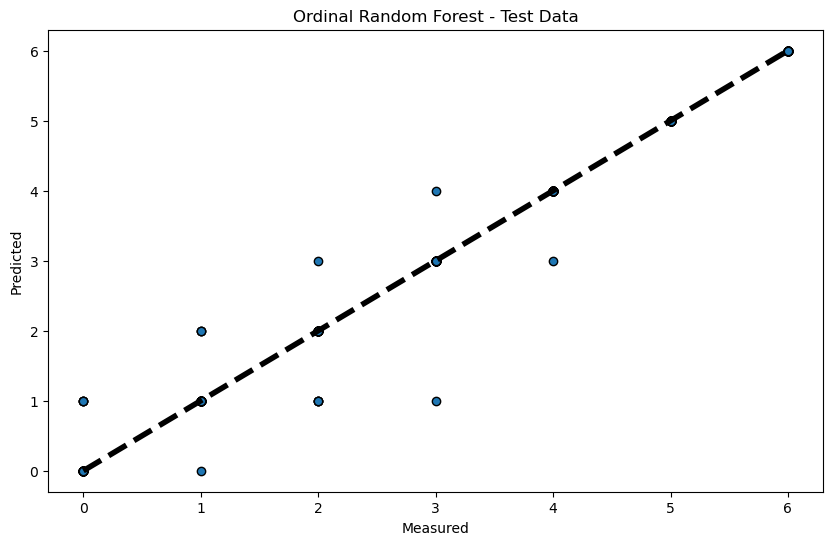

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("Ordinal Random Forest - Train MSE:", mse_train_rf)
print("Ordinal Random Forest - Test MSE:", mse_test_rf)
print("Ordinal Random Forest - Train R2:", r2_train_rf)
print("Ordinal Random Forest - Test R2:", r2_test_rf)
#print("Classification Report:\n", classification_report(y_test, y_pred_test_rf))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ordinal Random Forest - Test Data')
plt.show()


These results indicate that the model performs exceptionally well on the training data (with perfect scores) and maintains high accuracy on the test data, suggesting a robust model with minimal overfitting. ALso, it shows lower MSE than the previously trained model. 

### Ordinal SVM Regressor

Ordinal SVM - Train MSE: 0.03654883163571001
Ordinal SVM - Test MSE: 0.05263157894736842
Ordinal SVM - Train R2: 0.9906555669265682
Ordinal SVM - Test R2: 0.9870177538850741


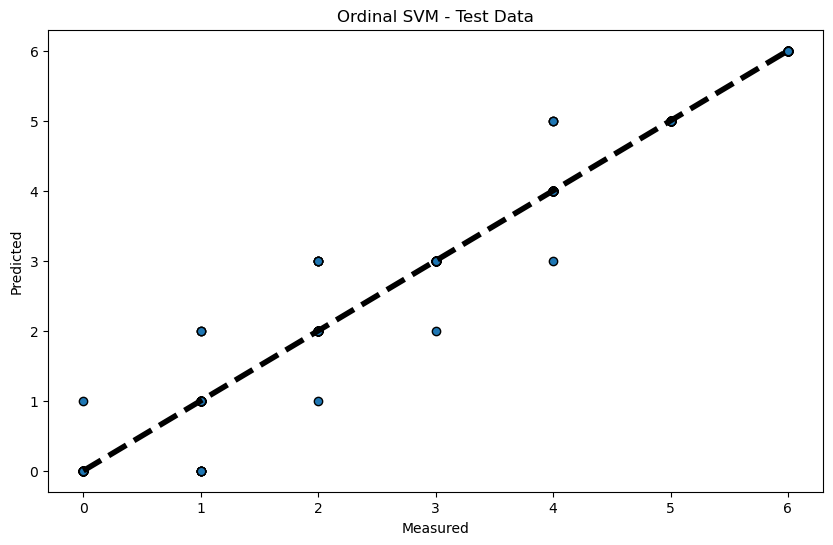

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

mse_train_svm = mean_squared_error(y_train, y_pred_train_svm)
mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)
r2_train_svm = r2_score(y_train, y_pred_train_svm)
r2_test_svm = r2_score(y_test, y_pred_test_svm)

print("Ordinal SVM - Train MSE:", mse_train_svm)
print("Ordinal SVM - Test MSE:", mse_test_svm)
print("Ordinal SVM - Train R2:", r2_train_svm)
print("Ordinal SVM - Test R2:", r2_test_svm)
#print("Classification Report:\n", classification_report(y_test, y_pred_test_svm))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_svm))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_svm, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ordinal SVM - Test Data')
plt.show()


The performance of the Ordinal SVM model for ordinal regression shows impressive results. The model achieved a training mean squared error (MSE) of 0.0365 and a test MSE of 0.0526, indicating a strong fit on both the training and test datasets. The R-squared (R2) values further support this, with a training R2 of 0.9907 and a test R2 of 0.9870, demonstrating high predictive accuracy and a minimal difference between training and test performance.

## Hyper Parameter Tuning - Regression 

Hyperparameter tuning for the Random Forest (RF) and Support Vector Machine (SVM) models can be a crucial step in improving their performance. Given that initial results have shown promising performance, fine-tuning these parameters could further refine the models, potentially reducing overfitting and improving the Mean Squared Error (MSE) and R-squared (R2) scores on both training and testing datasets. 

### Ordinal RF

In [74]:
# Ordinal Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Cross-Validation Score for Random Forest:", best_score_rf)

# Train the best model
rf_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the best model
y_pred_rf_best = rf_best.predict(X_test)
print("Best Random Forest - Test MSE:", mean_squared_error(y_test, y_pred_rf_best))
print("Best Random Forest - Test R2:", r2_score(y_test, y_pred_rf_best))
#print("Classification Report:\n", classification_report(y_test, np.round(y_pred_rf_best)))
#print("Confusion Matrix:\n", confusion_matrix(y_test, np.round(y_pred_rf_best)))


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score for Random Forest: 0.035140178022333705
Best Random Forest - Test MSE: 0.02482299308878256
Best Random Forest - Test R2: 0.9938770940938341


The motove is to find the best combination of parameters that minimizes the mean squared error (MSE) using 5-fold cross-validation. The best parameters are found to be {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}. Using these optimal parameters, a new Random Forest model is trained on the training data. The model's performance is evaluated on the test data, achieving a Test MSE of 0.02482299308878256 and a Test R2 score of 0.9938770940938341. These results demonstrate that hyperparameter tuning significantly improved the model's performance, as indicated by the high R2 score and low MSE on the test data.

### Ordinal SVM

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4, 1e-5],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm = SVC()

# Perform Grid Search with Cross-Validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Cross-Validation Score for SVM:", best_score_svm)

# Train the best model
svm_best = SVC(**best_params_svm)
svm_best.fit(X_train, y_train)

# Evaluate the best model
y_pred_svm_best = svm_best.predict(X_test)
print("Best SVM - Test MSE:", mean_squared_error(y_test, y_pred_svm_best))
print("Best SVM - Test R2:", r2_score(y_test, y_pred_svm_best))
#print("Classification Report:\n", classification_report(y_test, y_pred_svm_best))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))


Best Parameters for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score for SVM: 0.9281041520562479
Best SVM - Test MSE: 0.07416267942583732
Best SVM - Test R2: 0.9817068350198771


A parameter grid is defined for the SVM with various values for C, gamma, and kernel parameters. The GridSearchCV function is used to find the optimal combination of these parameters, which maximizes the accuracy score using 5-fold cross-validation. The best parameters identified are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, and the best cross-validation accuracy score is 0.9281041520562479. A new SVM model is trained using these optimal parameters, and its performance is evaluated on the test data. The model achieves a Test MSE of 0.07416267942583732 and a Test R2 score of 0.9817068350198771, indicating that hyperparameter tuning has not made any significant improvements the model's predictive performance.

### SHapley Additive exPlanations

In [ ]:
#pip install shap

  0%|          | 0/1669 [00:00<?, ?it/s]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=1.030e-03, previous alpha=1.008e-03, with an active set of 9 regressors.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=4.016e-04, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.416e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max

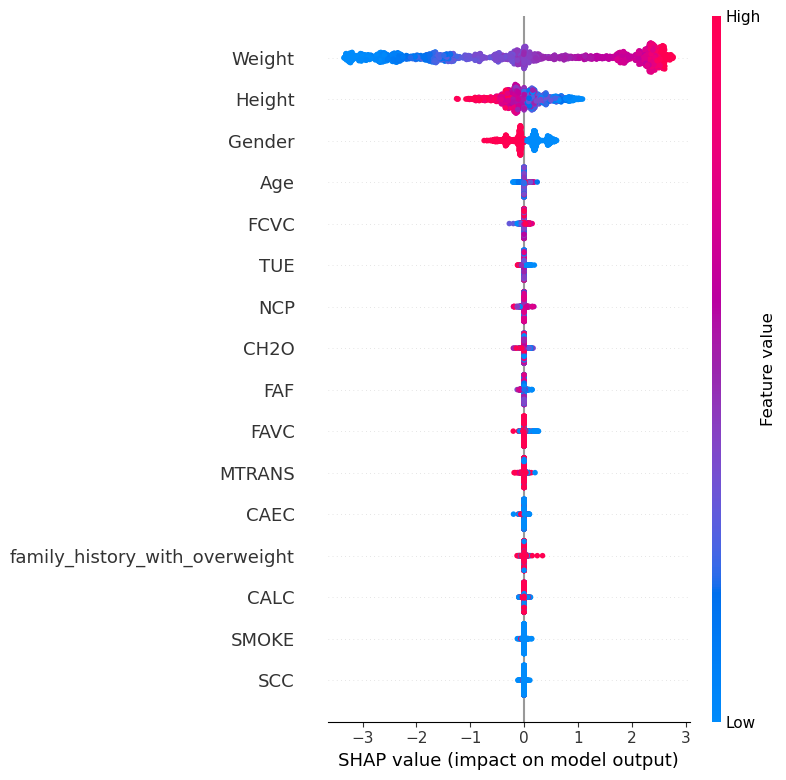

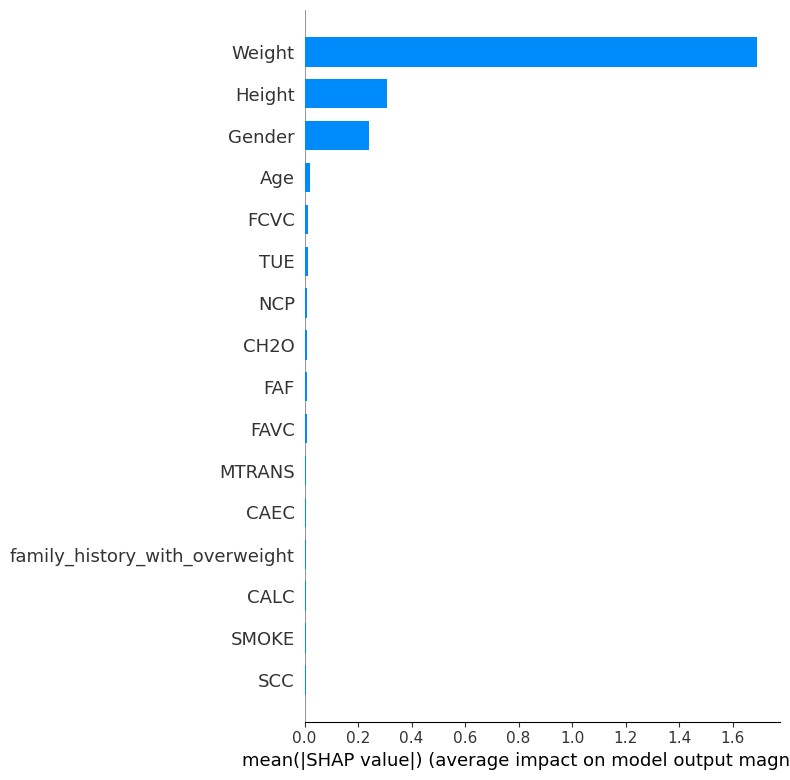

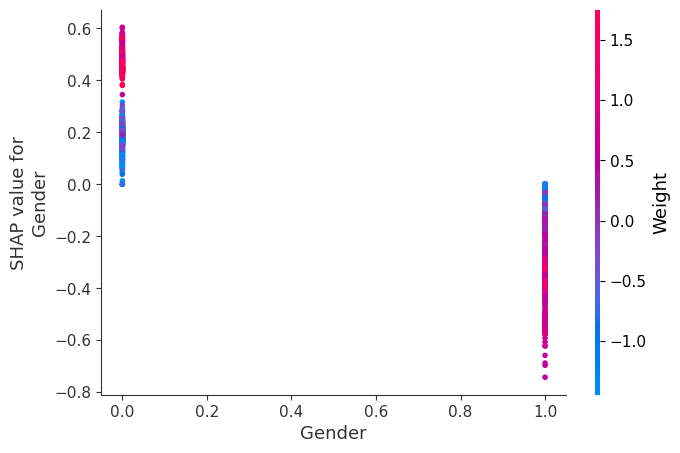

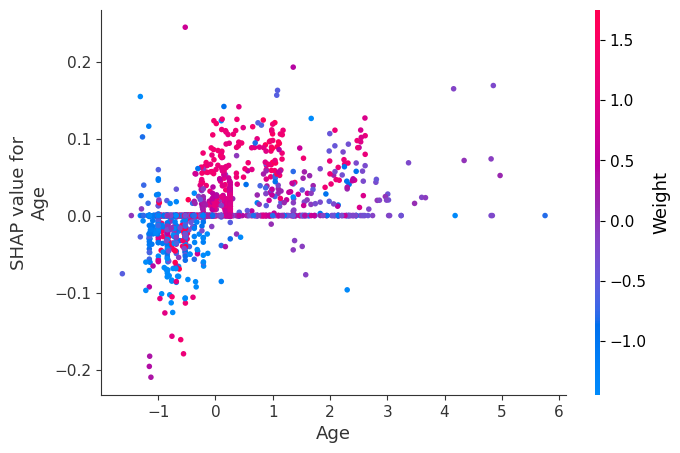

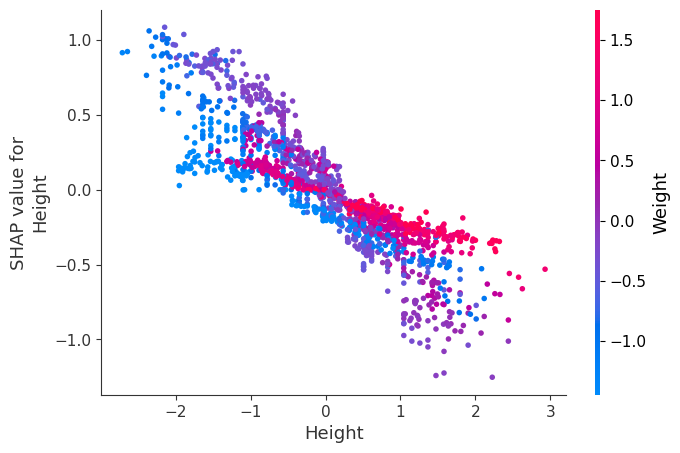

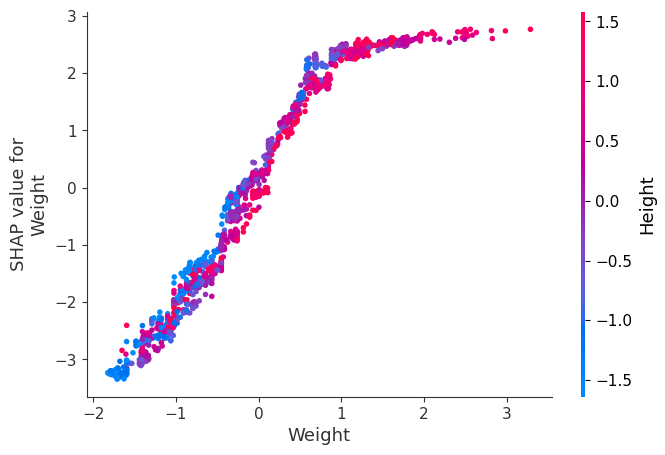

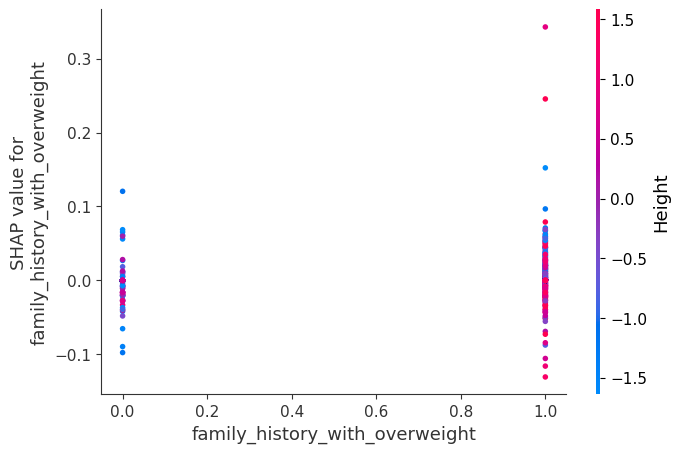

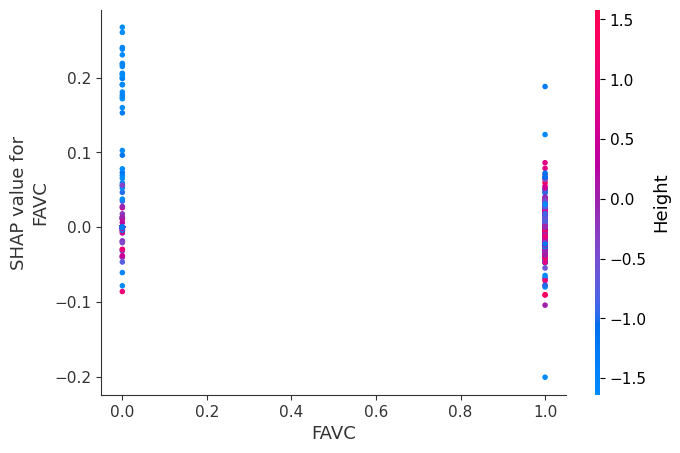

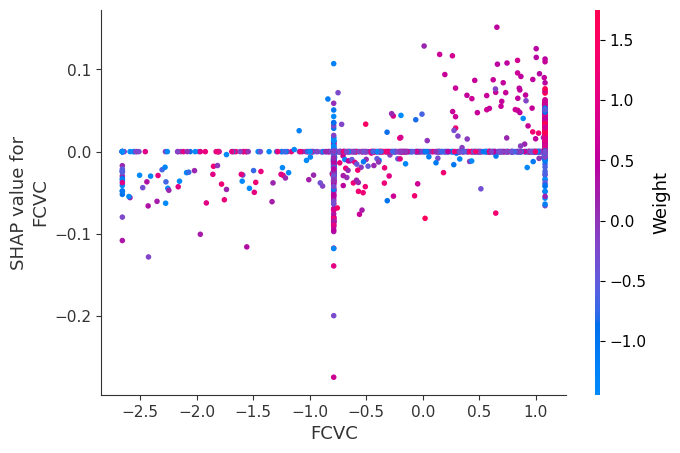

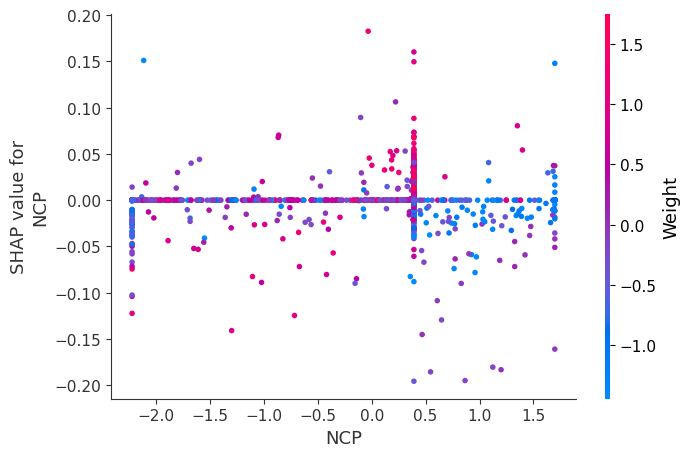

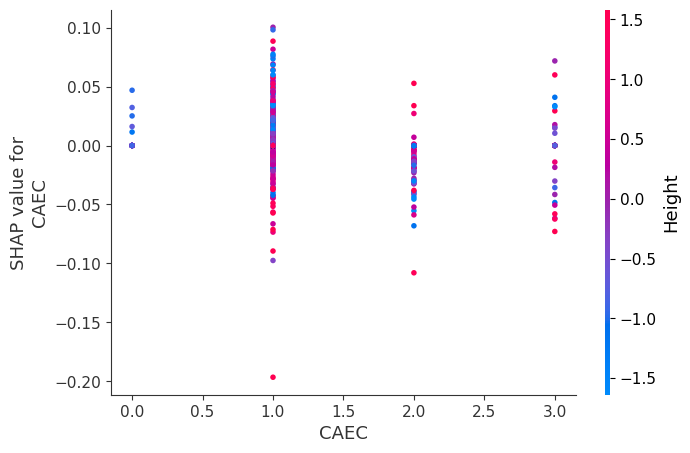

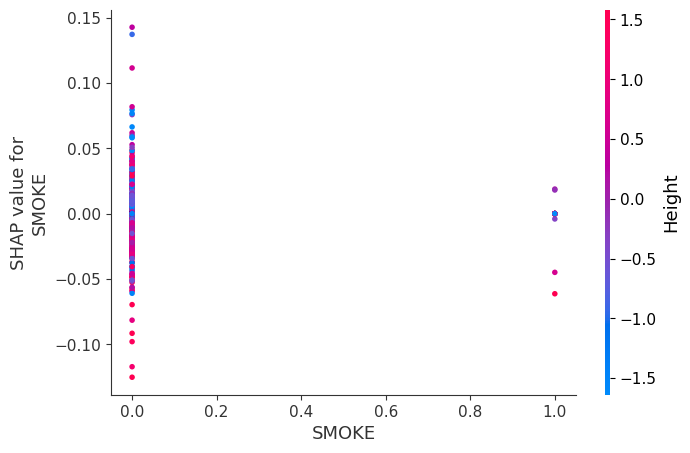

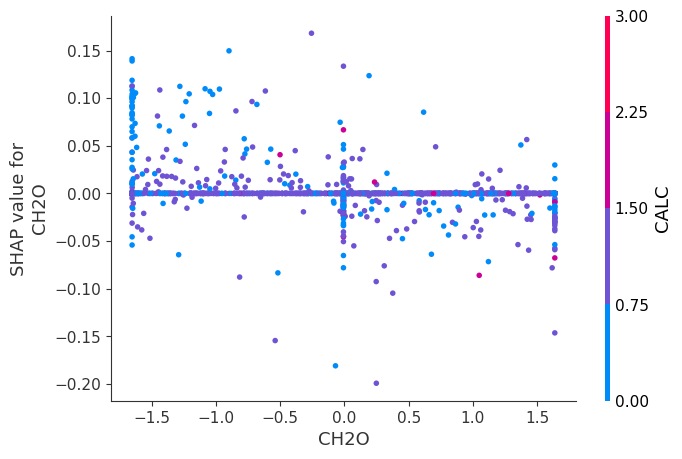

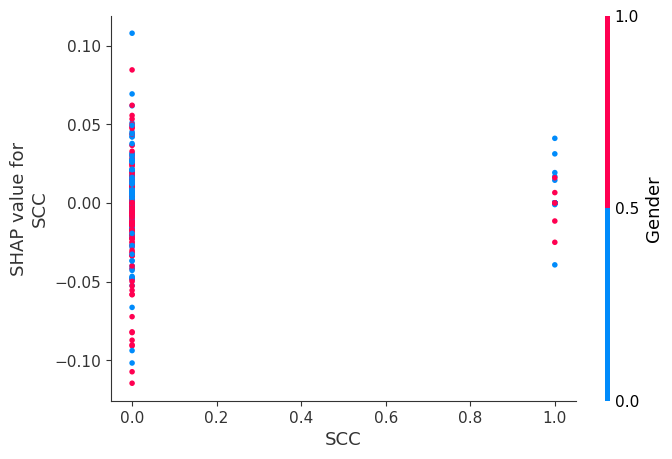

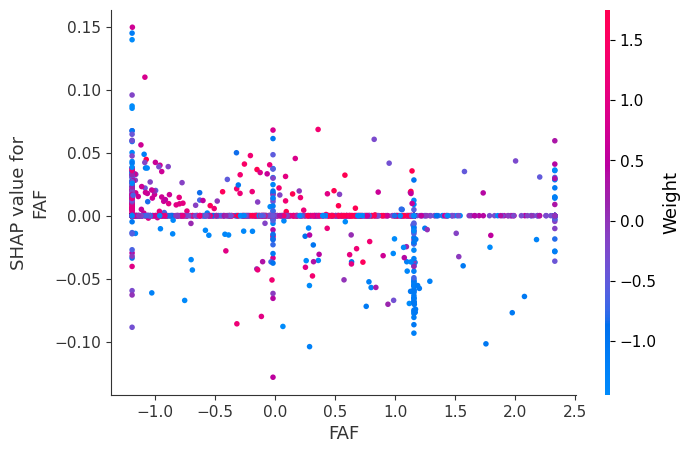

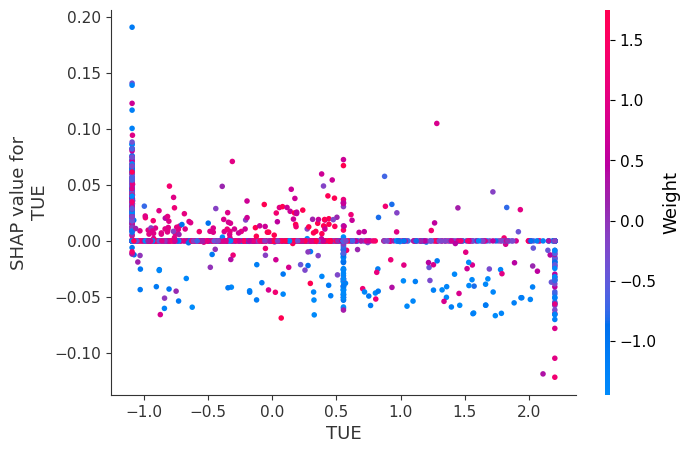

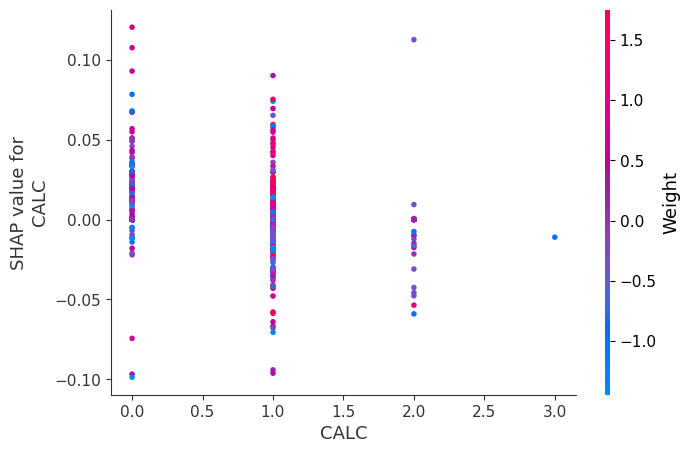

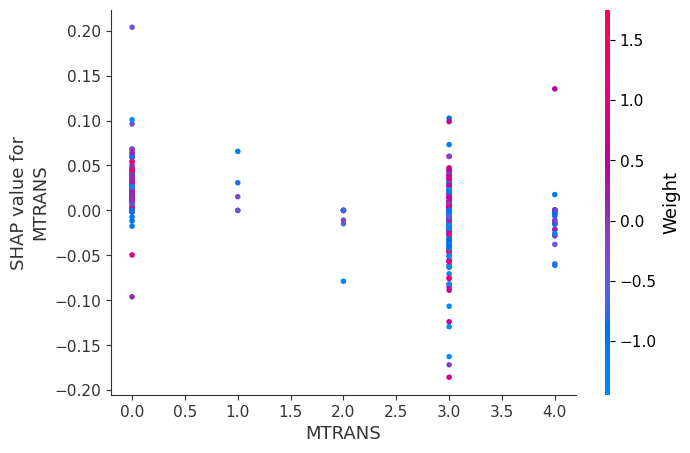

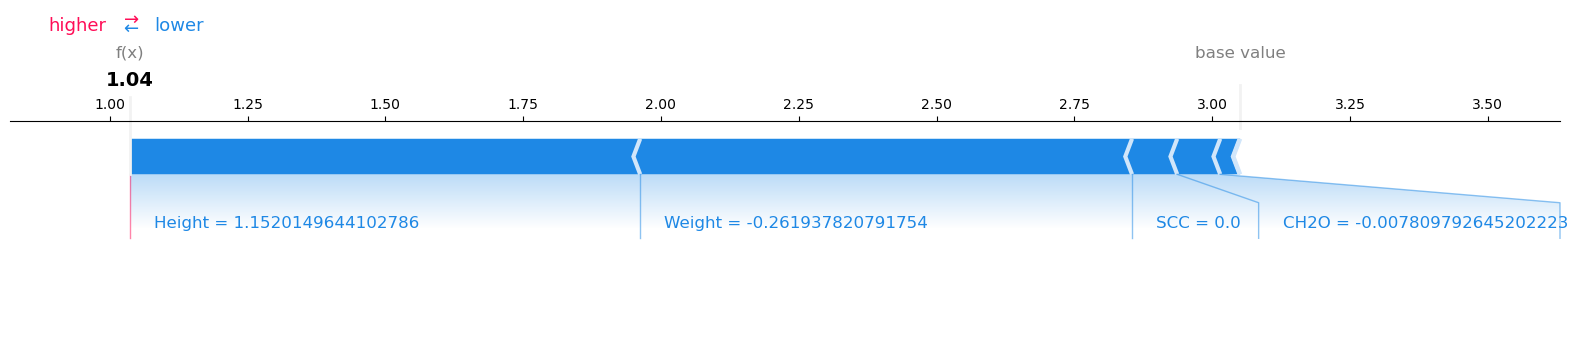

In [76]:
import shap
import matplotlib.pyplot as plt

# Summarize the background dataset with shap.sample
background = shap.sample(X_train,50) # Use 100 samples to summarize the background data

# Create the KernelExplainer with the summarized background
explainer = shap.KernelExplainer(rf_best.predict, background)
shap_values = explainer.shap_values(X_train, nsamples=50)# Reduce the number of samples for faster computation

# Plot the feature importance based on SHAP values
shap.summary_plot(shap_values, X_train)

# To see the impact of each feature on the prediction (positive/negative impact)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# If you want to see the impact of individual features
for feature_name in X_train.columns:
    shap.dependence_plot(feature_name, shap_values, X_train)

# If you want to visualize a specific prediction
index = 0  # You can change this index to visualize a specific prediction
shap.force_plot(explainer.expected_value, shap_values[index], X_train.iloc[index], matplotlib=True)


## Compare & Conclude - Regression 

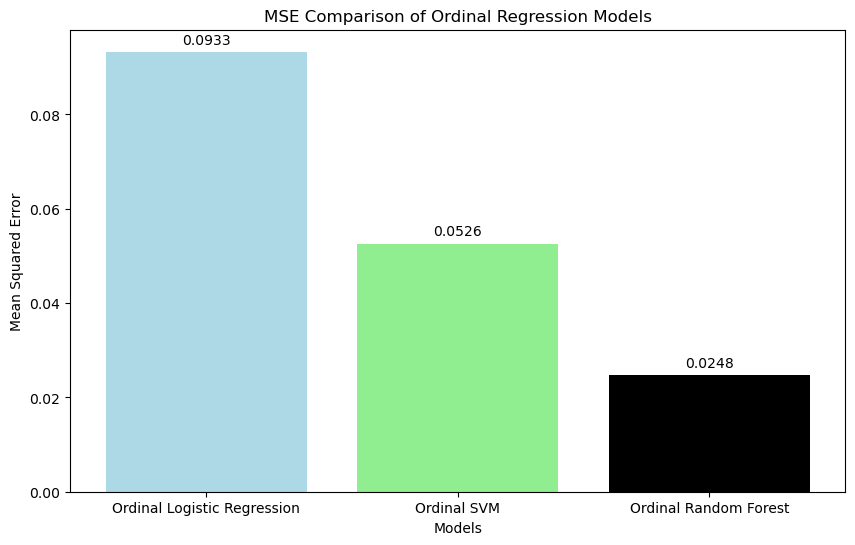

In [77]:
# Model names and their MSE values
models = ['Ordinal Logistic Regression' , 'Ordinal SVM', 'Ordinal Random Forest']
mse_values = [mse, mse_test_svm, mean_squared_error(y_test, y_pred_rf_best)]

# Plotting the MSE values
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color=['lightblue', 'lightgreen','Black'])

# Adding title and labels
plt.title('MSE Comparison of Ordinal Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

# Adding the MSE values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

# Show the plot
plt.show()

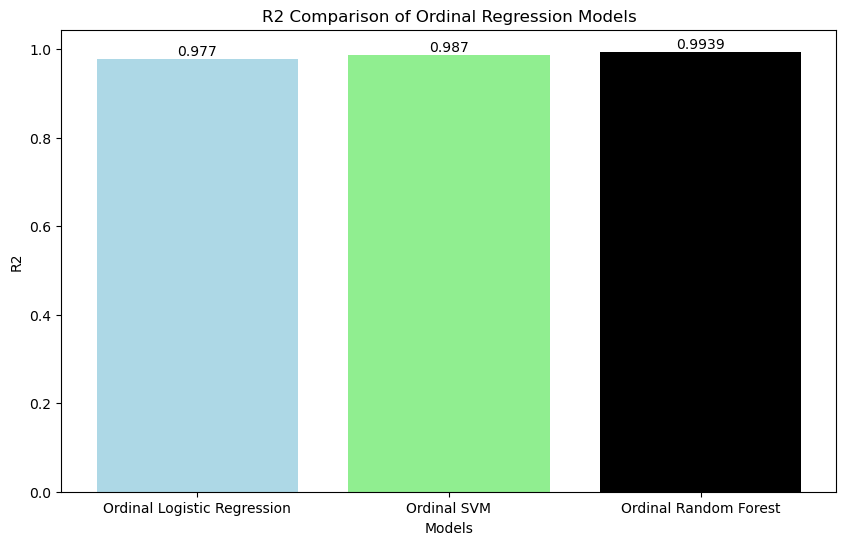

In [78]:
# Model names and their MSE values
models = ['Ordinal Logistic Regression' , 'Ordinal SVM', 'Ordinal Random Forest']
r2_values = [r2, r2_test_svm, r2_score(y_test, y_pred_rf_best)]

# Plotting the MSE values
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color=['lightblue', 'lightgreen','Black'])

# Adding title and labels
plt.title('R2 Comparison of Ordinal Regression Models')
plt.xlabel('Models')
plt.ylabel('R2')

# Adding the MSE values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

# Show the plot
plt.show()

The hyperparameter-tuned Ordinal Random Forest model achieved the lowest Mean Squared Error (MSE) of 0.0248 and a high R2 score of 0.9939. A low MSE indicates that the predicted values are very close to the actual values, reflecting high accuracy. The R2 score, which is very close to 1, signifies that the model explains almost all the variability in the target variable. This performance surpasses that of other modeled techniques, making the Ordinal Random Forest the most effective method for this dataset.